# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>

<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: matheus rodrigues ferreira e Vinicius Fernandes Terra

**RA**: 813919 e 814146



---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
#import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from fancyimpute import KNN
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from itertools import combinations
from sklearn.model_selection import learning_curve



In [2]:
from scripts import preprocessamento as pre
from scripts import experimentos as exp
from scripts import analise_resultados as ar
from scripts import analise_exploratoria as ae



In [3]:
# Leitura dos dados
data = pd.read_csv('datasets/RHP_data.csv')

# Visualização dos dados
data.head()

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


### Entendendo os dados
- **ID**: Identificação do paciente
- **Peso**: Peso do paciente
- **Altura**: Altura do paciente
- **IMC**: Índice de Massa Corporal
- **Atendimento**: Data do atendimento
- **DN**: Data de nascimento
- **Idade**: Idade do paciente
- **Convenio**: Convênio do paciente
- **Pulsos**: Pulso do paciente
- **PA Sistólica**: Pressão Arterial Sistólica
- **PA Diastólica**: Pressão Arterial Diastólica
- **PPA**: Pressão de Pulso Arterial
- **B2**: Segundo ruido cardiaco
- **Sopro**: Sopro cardíaco
- **FC**: Frequência Cardíaca
- **HDA 1**: História de Doença Atual 1
- **HDA 2**: História de Doença Atual 2
- **Sexo**: Sexo do paciente
- **Motivo 1**: Motivo 1 da consulta
- **Motivo 2**: Motivo 2 da consulta

In [4]:
# padronização dos nomes das colunas
ae.padronizar_colunas(data)

In [5]:
#olhando as medidas descritivas
data.describe()

,id,peso,altura,imc,pa_sistolica,pa_diastolica
count,17873.000000,17555.000000,17873.000000,13146.000000,10143.000000,10133.000000
mean,8937.000000,21.163520,83.865216,17.806329,101.314108,62.303661
std,5159.635016,18.061021,56.583610,12.071950,15.510066,8.885555
min,1.000000,-40.000000,0.000000,0.000000,10.000000,6.000000
25%,4469.000000,6.600000,36.000000,15.000000,90.000000,60.000000
50%,8937.000000,18.000000,99.000000,17.000000,100.000000,60.000000
75%,13405.000000,31.000000,130.000000,19.000000,110.000000,70.000000
max,17873.000000,157.000000,198.000000,848.000000,990.000000,120.000000


In [6]:
# vendo os tipos das colunas
data.dtypes

id                 int64
peso             float64
altura             int64
imc              float64
atendimento       object
dn                object
idade             object
convenio          object
pulsos            object
pa_sistolica     float64
pa_diastolica    float64
ppa               object
b2                object
sopro             object
fc                object
hda_1             object
hda_2             object
sexo              object
motivo_1          object
motivo_2          object
dtype: object

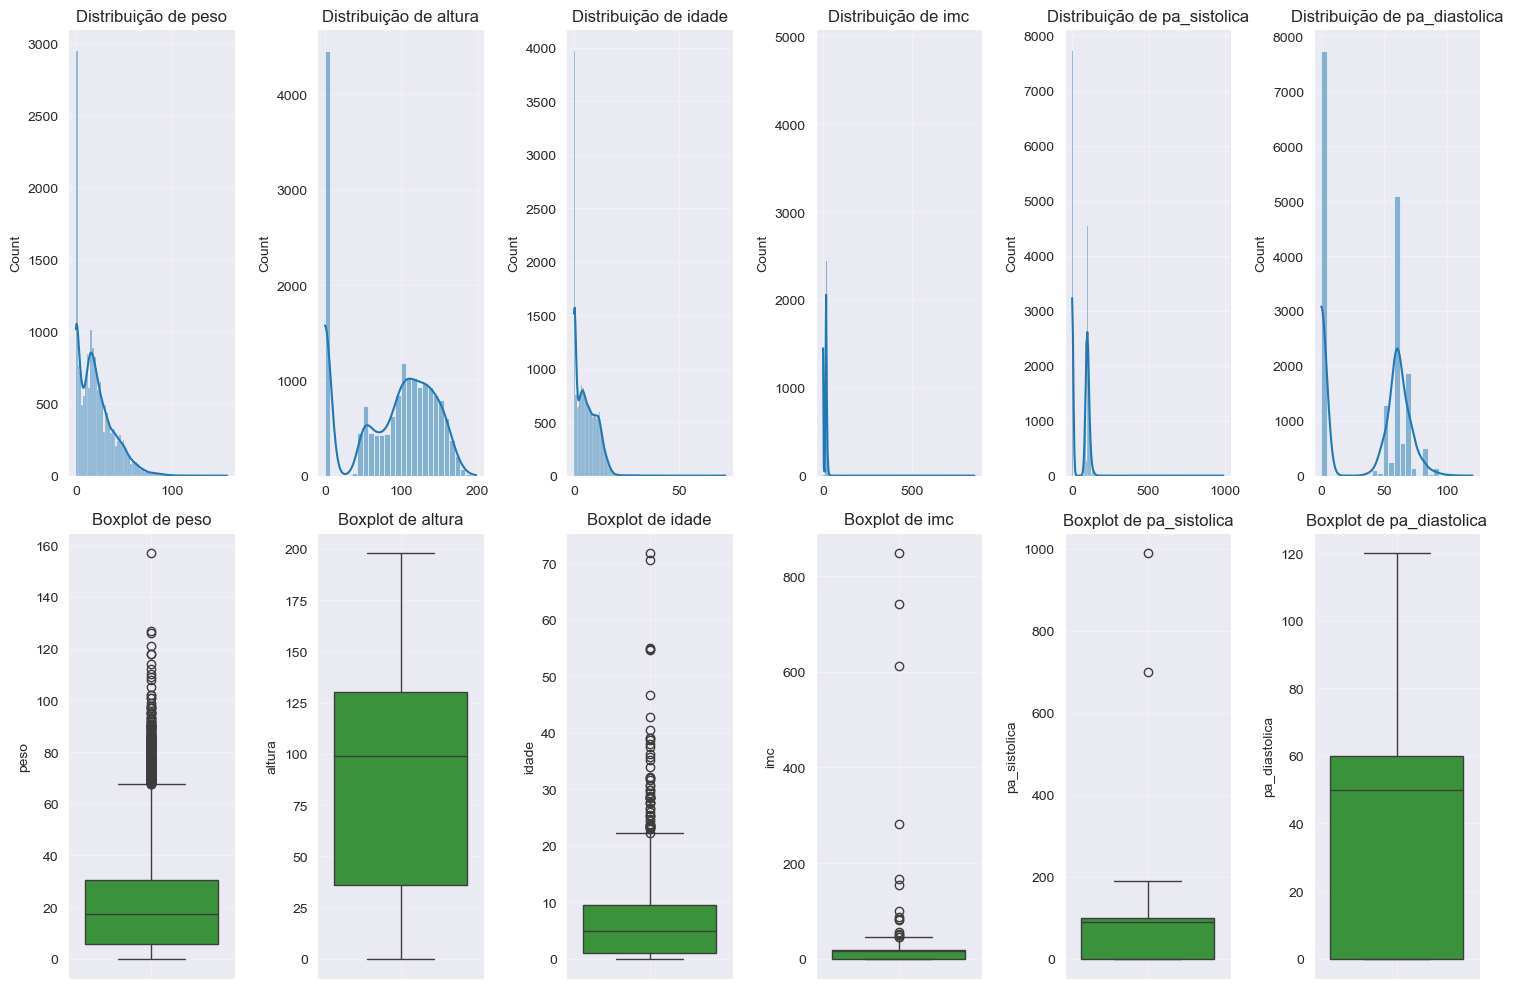

In [106]:
# Configurações gerais
cols_numericas = ['peso', 'altura','idade', 'imc', 'pa_sistolica', 'pa_diastolica']

plt.figure(figsize=(15, 10))
num_cols = len(cols_numericas)
cor_hist = '#1f77b4'  # Azul
cor_box = '#2ca02c'   # Verde

# Plotagem de Histogramas
for i, col in enumerate(cols_numericas, 1):
    plt.subplot(2, num_cols, i)
    sns.histplot(data[col], color=cor_hist, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.grid(alpha=0.3)

# Plotagem de Boxplots
for i, col in enumerate(cols_numericas, 1):
    plt.subplot(2, num_cols, i + num_cols)
    sns.boxplot(y=data[col], color=cor_box)
    plt.title(f'Boxplot de {col}')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

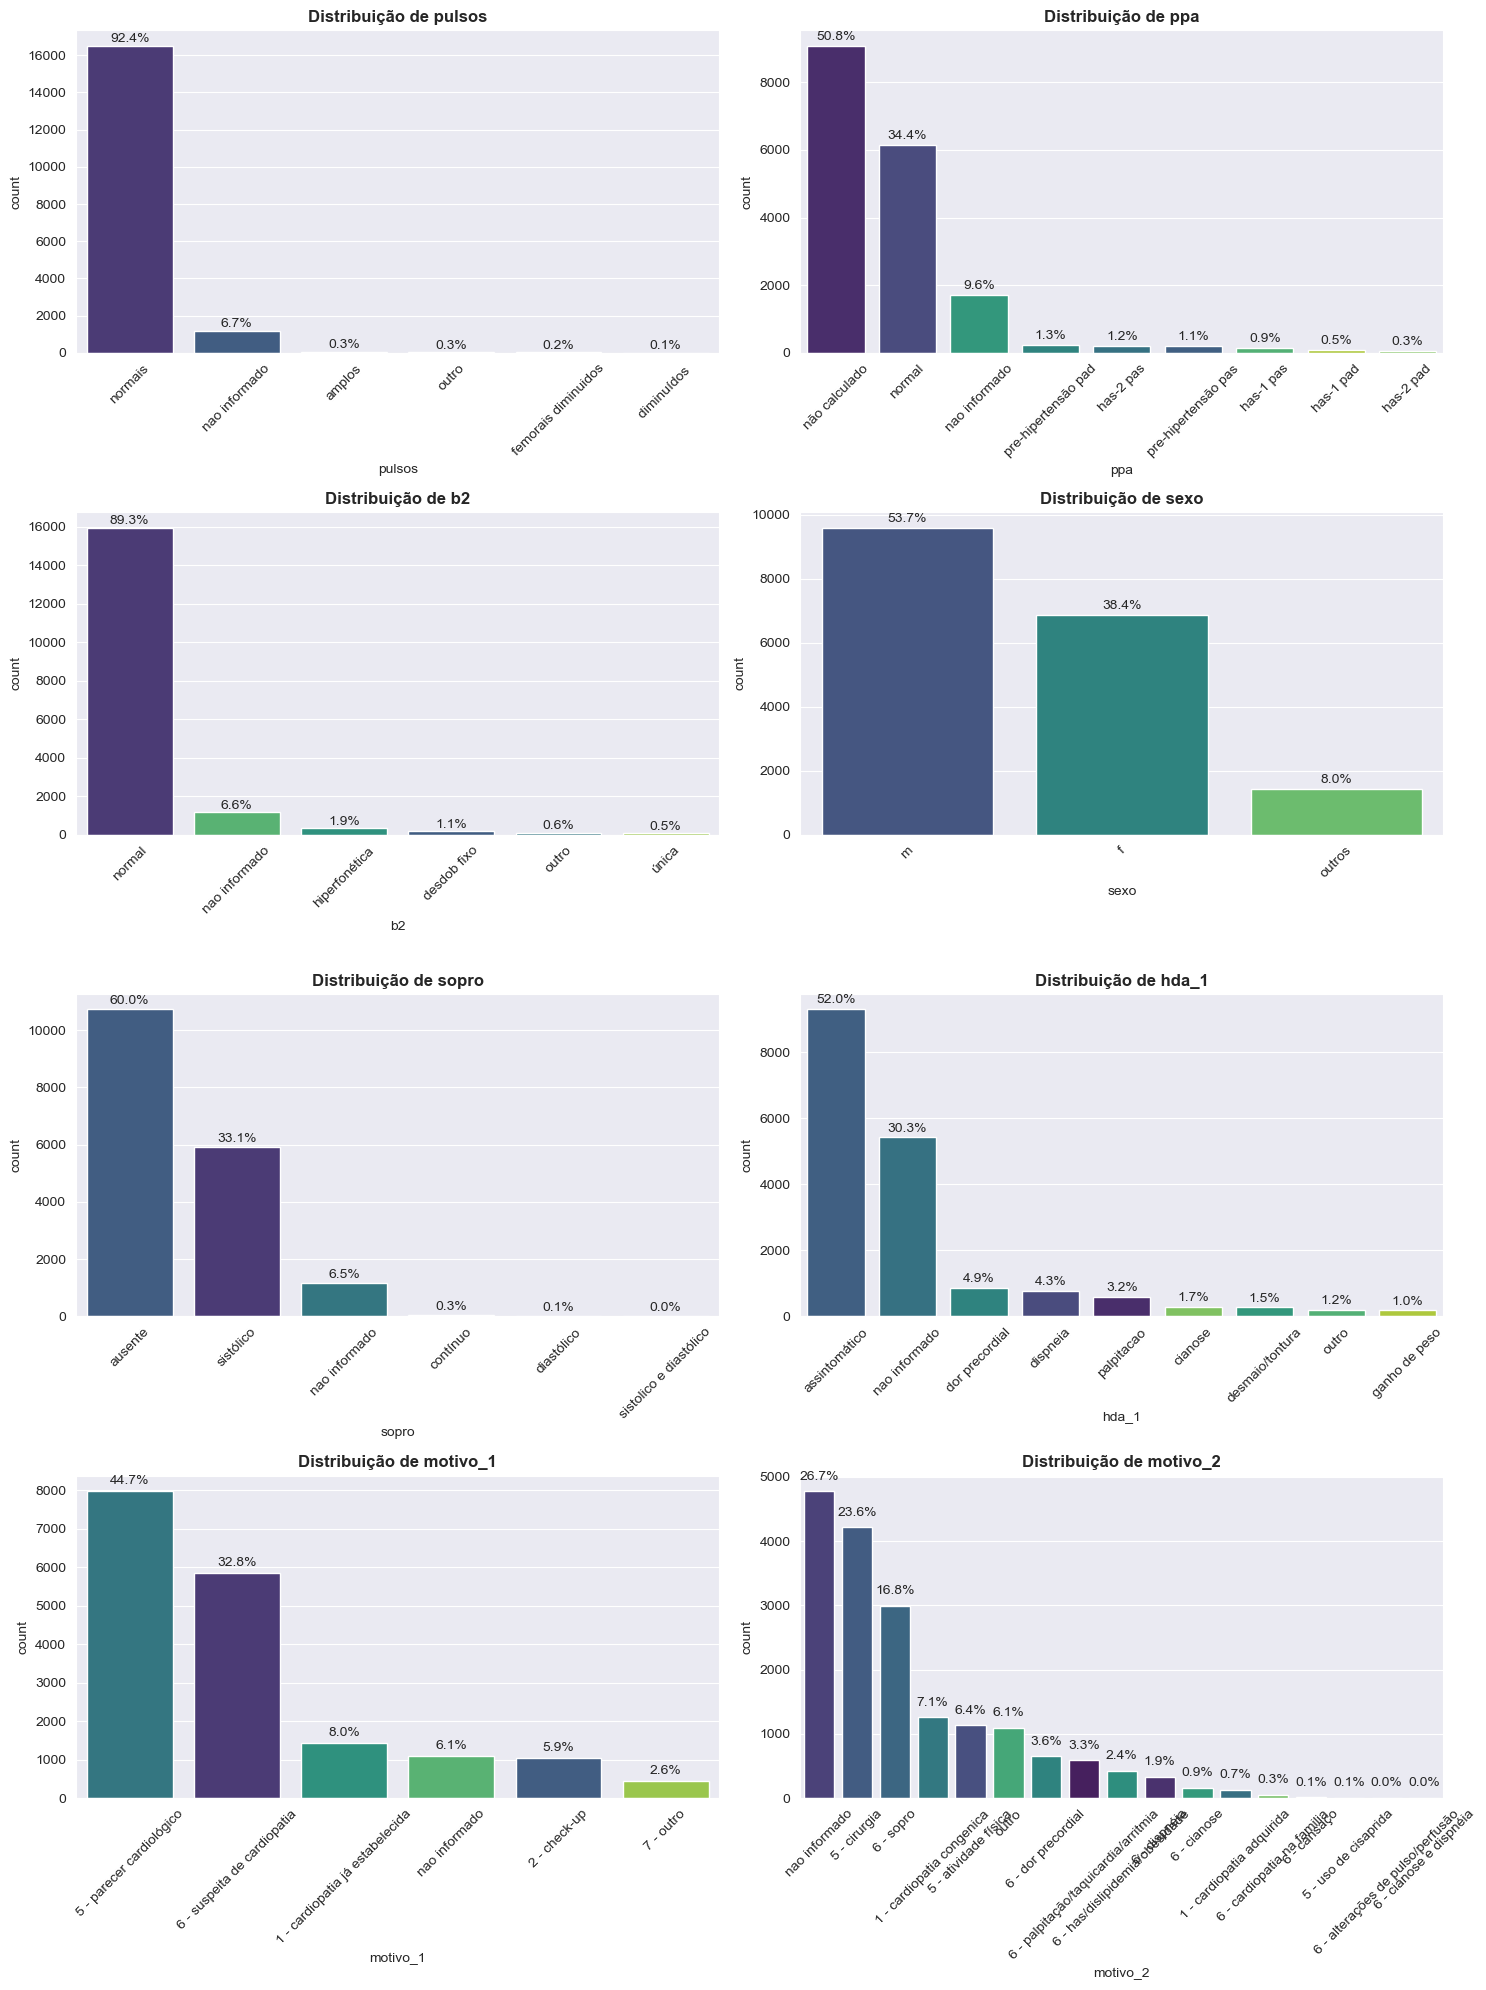

In [109]:
cols_categoricas = [ 'pulsos', 'ppa', 'b2', 'sexo', 'sopro', 'hda_1', 'motivo_1', 'motivo_2']

# Configurações
n_cols = 2  # Colunas por linha
n_rows = -(-len(cols_categoricas) // n_cols)  # Cálculo de linhas necessárias
paleta = 'viridis'

# Criar figura
plt.figure(figsize=(15, 5 * n_rows))

# Loop pelas colunas categóricas
for idx, col in enumerate(cols_categoricas, 1):

    # Contar valores e ordenar
    contagem = data[col].value_counts().sort_values(ascending=False)

    # Gráfico de Barras
    plt.subplot(n_rows, n_cols, idx)
    ax = sns.countplot(
        data=data,
        x=col,
        order=contagem.index,
        palette=paleta,
        hue=col,
        legend=False
    )
    plt.title(f'Distribuição de {col}', fontweight='bold')
    plt.xticks(rotation=45)

    # Adicionar porcentagens
    total = len(data[col])
    for p in ax.patches:
        altura = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            altura + 0.01*total,
            f'{altura/total:.1%}',
            ha='center'
        )

# Ajustar layout
plt.tight_layout()
plt.show()


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [8]:
#dropar colunas que não serão utilizadas
data.drop(columns=['atendimento', 'dn','convenio','hda_2'], inplace=True)

In [9]:
#colunas numericas

for col in cols_numericas:
    data[col] = data[col].apply(lambda x: 0 if x == '#VALUE!' else float(x))
    data[col] = data[col].apply(lambda x: 0 if x < 0 else x)
    data[col] = data[col].fillna(0)

    
data[cols_numericas].isnull().sum()

peso             0
altura           0
idade            0
imc              0
pa_sistolica     0
pa_diastolica    0
dtype: int64

In [10]:
#colunas categoricas

for col in cols_categoricas:
    data[col] = data[col].replace('#VALUE!', pd.NA)
    data[col] = data[col].fillna('Nao informado')
    data[col] = data[col].apply(lambda x: x.lower())

# em sexo, substituir 'masculino' por 'm' e 'feminino' por 'f'
data['sexo'] = data['sexo'].replace('masculino', 'm')
data['sexo'] = data['sexo'].replace('feminino', 'f')
data['sexo'] = data['sexo'].replace('nao informado', 'outros')
data['sexo'] = data['sexo'].replace('indeterminado', 'outros')

data[cols_categoricas].isnull().sum()

pulsos      0
ppa         0
b2          0
sexo        0
sopro       0
hda_1       0
motivo_1    0
motivo_2    0
dtype: int64

In [11]:
#transformando fc em float
data['fc'] = data['fc'].fillna(0)
data['fc'] = data['fc'].astype(str).str.extract(r'(\d+)')[0]
data['fc'] = data['fc'].astype(float)

### separando os dados em treino e teste

In [ ]:
# separando os dados em treino e teste
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

#trocando o nome da coluna Id para id em df_test e df_train
df_test.rename(columns={'Id':'id'}, inplace=True)
df_train.rename(columns={'Id':'id'}, inplace=True)

#dando merge de data com df_train usando o id, mas mantendo a ordem de ids de df_train
data_train = pd.merge(df_train, data, on='id', how='inner')

#dando merge de data com df_test usando o id, mas mantendo a ordem de ids de df_test
data_test = pd.merge(df_test, data, on='id', how='inner')

In [108]:
data_train.head()

,id,CLASSE,peso,altura,imc,idade,pulsos,pa_sistolica,pa_diastolica,ppa,b2,sopro,fc,hda_1,sexo,motivo_1,motivo_2
0,10524,Normal,28.0,123.0,19.0,5.79,normais,110.0,80.0,has-1 pad,normal,ausente,100.0,palpitacao,m,6 - suspeita de cardiopatia,6 - palpitação/taquicardia/arritmia
1,17249,Anormal,32.0,0.0,0.0,12.11,normais,100.0,60.0,não calculado,normal,sistólico,100.0,assintomático,m,5 - parecer cardiológico,nao informado
2,4483,Anormal,13.0,87.0,17.0,2.21,normais,0.0,0.0,não calculado,normal,sistólico,100.0,assintomático,m,6 - suspeita de cardiopatia,6 - sopro
3,6830,Normal,11.0,0.0,0.0,1.60,normais,0.0,0.0,não calculado,normal,ausente,100.0,nao informado,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica
4,11652,Normal,42.4,136.0,23.0,0.06,normais,100.0,60.0,não calculado,normal,ausente,78.0,assintomático,f,5 - parecer cardiológico,nao informado


In [109]:
data_train.shape

(14727, 17)

In [110]:
#ver se tem algum valor nulo em data_train
data_train['CLASSE'].isnull().sum()


1168

In [13]:
#removendo linhas onde a classe é nula
data_train = data_train.dropna(subset=['CLASSE'])

In [112]:
#analisar distribuicao das colunas categoricas
ae.analisar_distribuicao(data_train, cols_categoricas)

Distribuição de classes na coluna 'pulsos':
pulsos
normais                13375
nao informado             46
amplos                    46
outro                     39
femorais diminuidos       36
diminuídos                17
Name: count, dtype: int64


Distribuição de classes na coluna 'ppa':
ppa
não calculado          6978
normal                 4917
nao informado           917
pre-hipertensão pad     182
has-2 pas               170
pre-hipertensão pas     159
has-1 pas               119
has-1 pad                69
has-2 pad                48
Name: count, dtype: int64


Distribuição de classes na coluna 'b2':
b2
normal           12930
hiperfonética      283
desdob fixo        157
outro               86
única               73
nao informado       30
Name: count, dtype: int64


Distribuição de classes na coluna 'sexo':
sexo
m         7572
f         5400
outros     587
Name: count, dtype: int64


Distribuição de classes na coluna 'sopro':
sopro
ausente                   8708
sistólico    

### limpando colunas numericas

In [14]:
# quantidade de valores 0 nas colunas numericas
for col in cols_numericas:
    print(f'{col}: {data_train[col].value_counts()[0]}')
    

peso: 1740
altura: 2965
idade: 971
imc: 3266
pa_sistolica: 5339
pa_diastolica: 5349


### começando com idade pois é a coluna com menos valores 0

<Axes: >

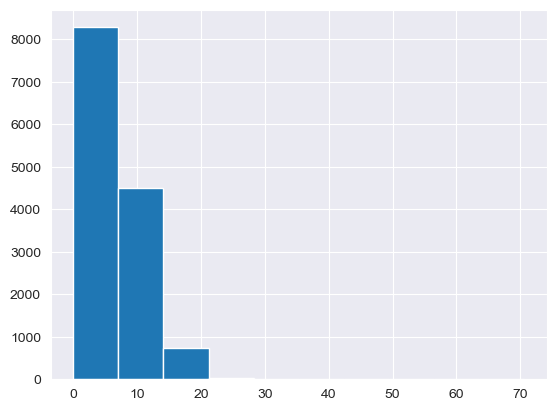

In [15]:
#vendo a distribuicao de idade
data_train['idade'].hist()


<Axes: >

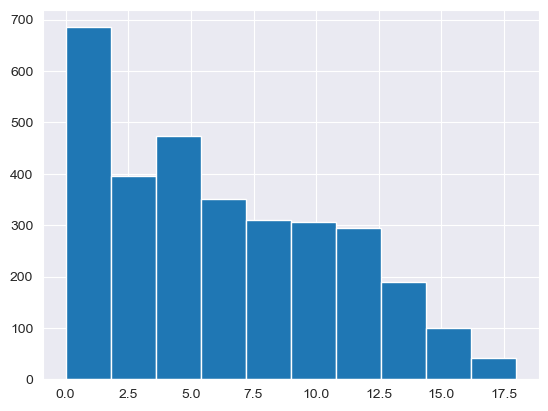

In [16]:
data_test['idade'].hist()

In [17]:
#quem tem idade maior que 19 não importa, então remover
data_train = data_train[data_train['idade'] <= 19]

#quem tiver idade menor que 0 ou igual a 0, substituir pela mediana
data_train['idade'] = data_train['idade'].apply(lambda x: data_train['idade'].median() if x <= 0 else x)

In [18]:
#quem tiver idade menor que 0 ou igual a 0, substituir pela mediana
data_test['idade'] = data_test['idade'].apply(lambda x: data_test['idade'].median() if x <= 0 or x>19 else x)

In [19]:
data_train= pre.remove_outliers(data_train,'idade')

In [20]:
#vendo a quantidade de 0
print("0 em treino: " + str((data_train['idade'] <= 0).sum()))
print("0 em teste: " + str((data_test['idade'] <= 0).sum()))


0 em treino: 0
0 em teste: 0


In [120]:
data_train

,id,CLASSE,peso,altura,imc,idade,pulsos,pa_sistolica,pa_diastolica,ppa,b2,sopro,fc,hda_1,sexo,motivo_1,motivo_2
0,10524,Normal,28.0,123.0,19.0,5.79,normais,110.0,80.0,has-1 pad,normal,ausente,100.0,palpitacao,m,6 - suspeita de cardiopatia,6 - palpitação/taquicardia/arritmia
1,17249,Anormal,32.0,0.0,0.0,12.11,normais,100.0,60.0,não calculado,normal,sistólico,100.0,assintomático,m,5 - parecer cardiológico,nao informado
2,4483,Anormal,13.0,87.0,17.0,2.21,normais,0.0,0.0,não calculado,normal,sistólico,100.0,assintomático,m,6 - suspeita de cardiopatia,6 - sopro
3,6830,Normal,11.0,0.0,0.0,1.60,normais,0.0,0.0,não calculado,normal,ausente,100.0,nao informado,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica
4,11652,Normal,42.4,136.0,23.0,0.06,normais,100.0,60.0,não calculado,normal,ausente,78.0,assintomático,f,5 - parecer cardiológico,nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14721,3023,Normal,25.0,126.0,16.0,8.80,normais,100.0,60.0,normal,normal,ausente,76.0,assintomático,f,5 - parecer cardiológico,nao informado
14723,3249,Anormal,30.0,113.0,23.0,4.97,normais,105.0,70.0,pre-hipertensão pad,normal,sistólico,92.0,dispneia,f,6 - suspeita de cardiopatia,6 - dispnéia
14724,3207,Normal,25.8,130.0,15.0,7.69,normais,90.0,55.0,normal,normal,ausente,78.0,assintomático,m,6 - suspeita de cardiopatia,6 - sopro
14725,4336,Normal,19.0,0.0,0.0,3.23,normais,100.0,50.0,não calculado,normal,ausente,100.0,assintomático,m,5 - parecer cardiológico,nao informado


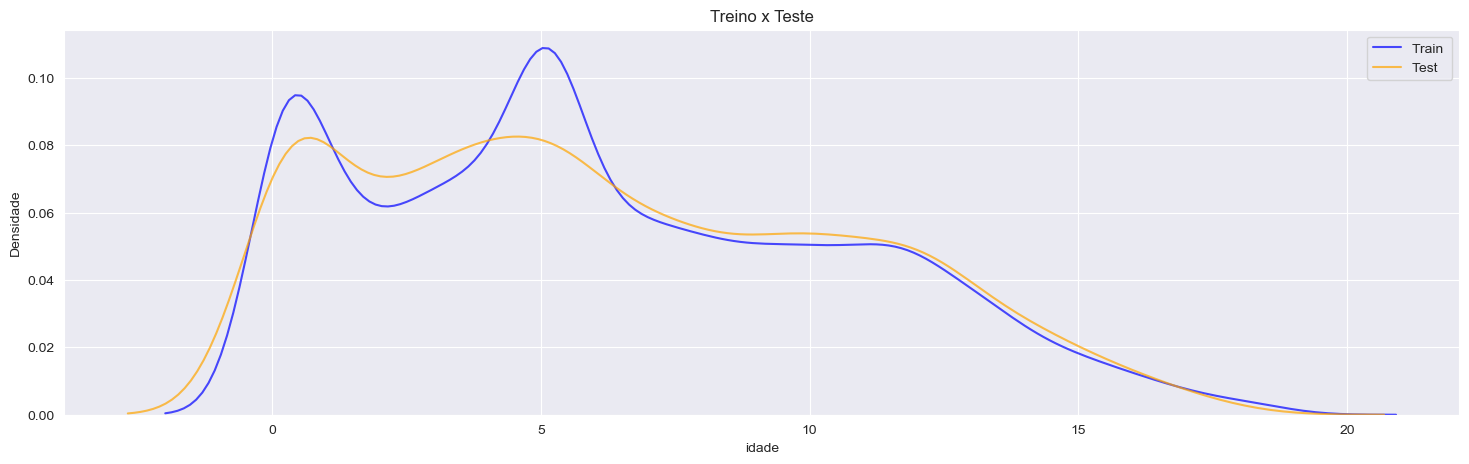

In [21]:
pre.plot_train_vs_test(data_train, data_test, 'idade')

### continuando com altura

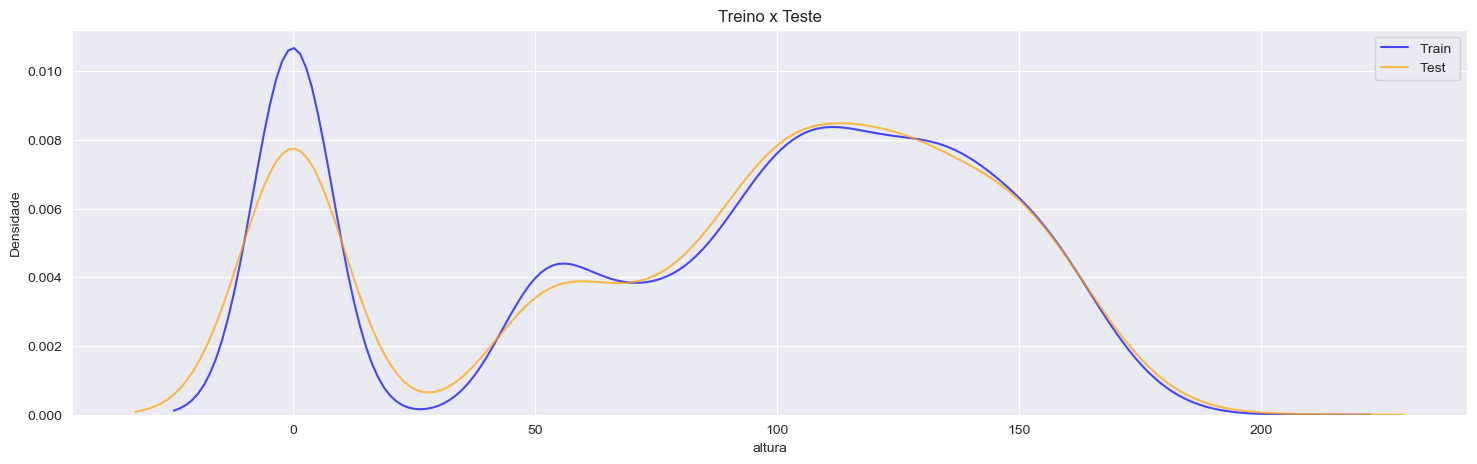

In [22]:
pre.plot_train_vs_test(data_train, data_test, 'altura')

In [23]:
data_aux_train_rf = data_train[[ 'altura', 'sexo', 'idade']].copy()
data_aux_train_rf = pre.preencher_alturas_randomForest(data_aux_train_rf)

data_aux_test_rf = data_test[[ 'altura', 'sexo', 'idade']].copy()
data_aux_test_rf = pre.preencher_alturas_randomForest(data_aux_test_rf)

In [24]:
#removendo outliers de altura em data_train
data_aux_train_rf = pre.remove_outliers(data_aux_train_rf, 'altura')

#substituindo outliers de altura em data_test pela mediana
data_aux_test_rf = pre.replace_outliers_with_median(data_aux_test_rf, 'altura')

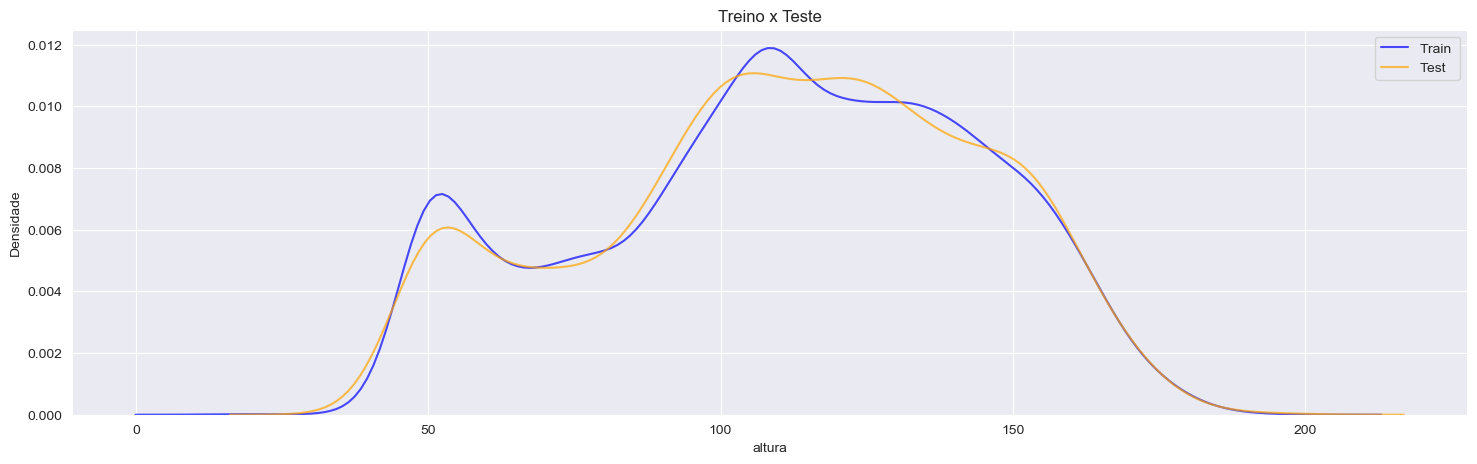

In [25]:
#plotando a diferença de teste e treino
pre.plot_train_vs_test(data_aux_train_rf, data_aux_test_rf, 'altura')

In [26]:
data_aux_train_knn = data_train.copy()
data_aux_train_knn = pre.preencher_altura_knn(data_aux_train_knn)

data_aux_test_knn = data_test.copy()
data_aux_test_knn = pre.preencher_altura_knn(data_aux_test_knn)

# Verificar se ainda há valores 0
print("Valores 0 em data_aux_train:", (data_aux_train_knn['altura'] == 0).sum())
print("Valores 0 em data_aux_test:", (data_aux_test_knn['altura'] == 0).sum())

Valores 0 em data_aux_train: 0
Valores 0 em data_aux_test: 0


In [27]:
#removendo outliers de altura em data_train
data_aux_train_knn = pre.remove_outliers(data_aux_train_knn, 'altura')

#substituindo outliers de altura em data_test pela mediana
data_aux_test_knn = pre.replace_outliers_with_median(data_aux_test_knn, 'altura')

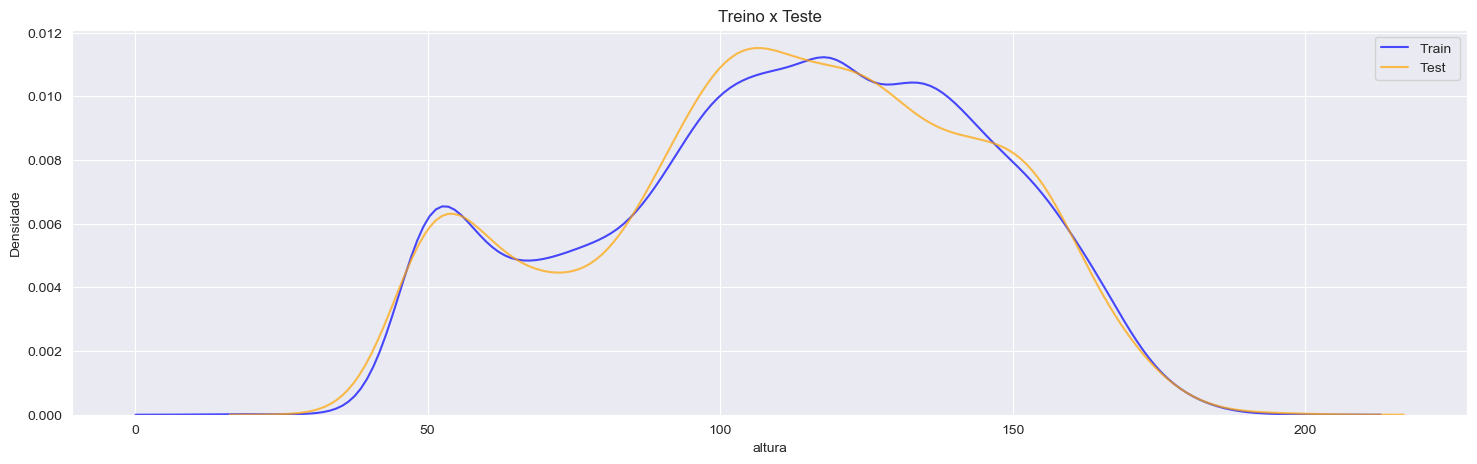

In [128]:
pre.plot_train_vs_test(data_aux_train_knn, data_aux_test_knn, 'altura')

In [28]:
#criando data_aux_train_rl e data_aux_test_rl
data_aux_train_rl = data_train[[ 'altura', 'sexo', 'idade']].copy()
data_aux_train_rl = pre.preencher_altura_regressao_linear(data_aux_train_rl)

data_aux_test_rl = data_test[[ 'altura', 'sexo', 'idade']].copy()
data_aux_test_rl = pre.preencher_altura_regressao_linear(data_aux_test_rl)

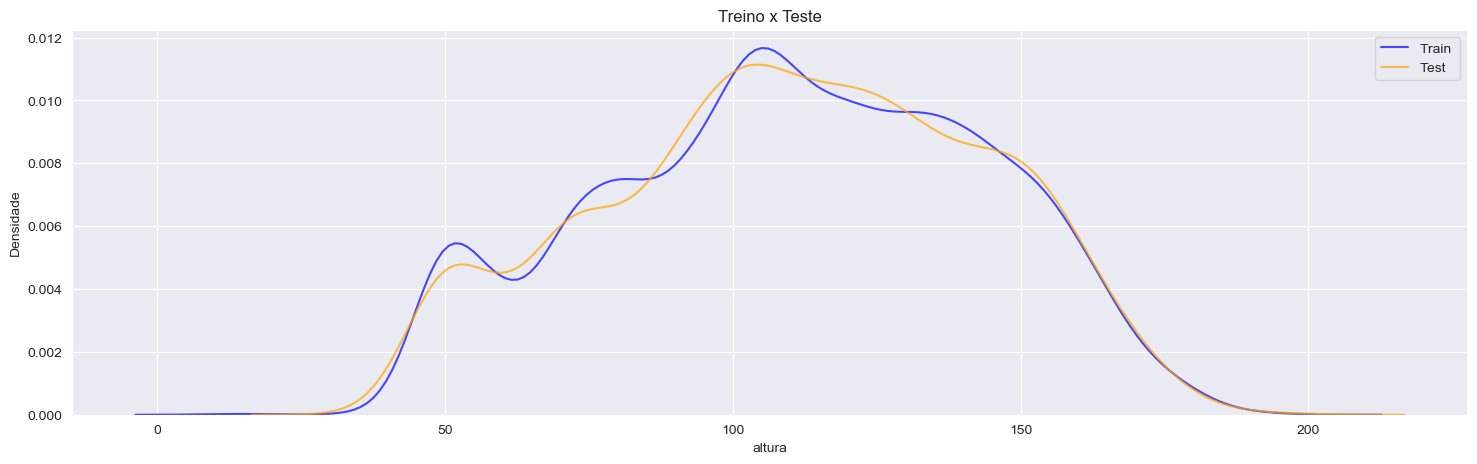

In [29]:
#removendo outliers de altura em data_train
data_aux_train_rl = pre.remove_outliers(data_aux_train_rl, 'altura')

#substituindo outliers de altura em data_test pela mediana
data_aux_test_rl = pre.replace_outliers_with_median(data_aux_test_rl, 'altura')

pre.plot_train_vs_test(data_aux_train_rl, data_aux_test_rl, 'altura')



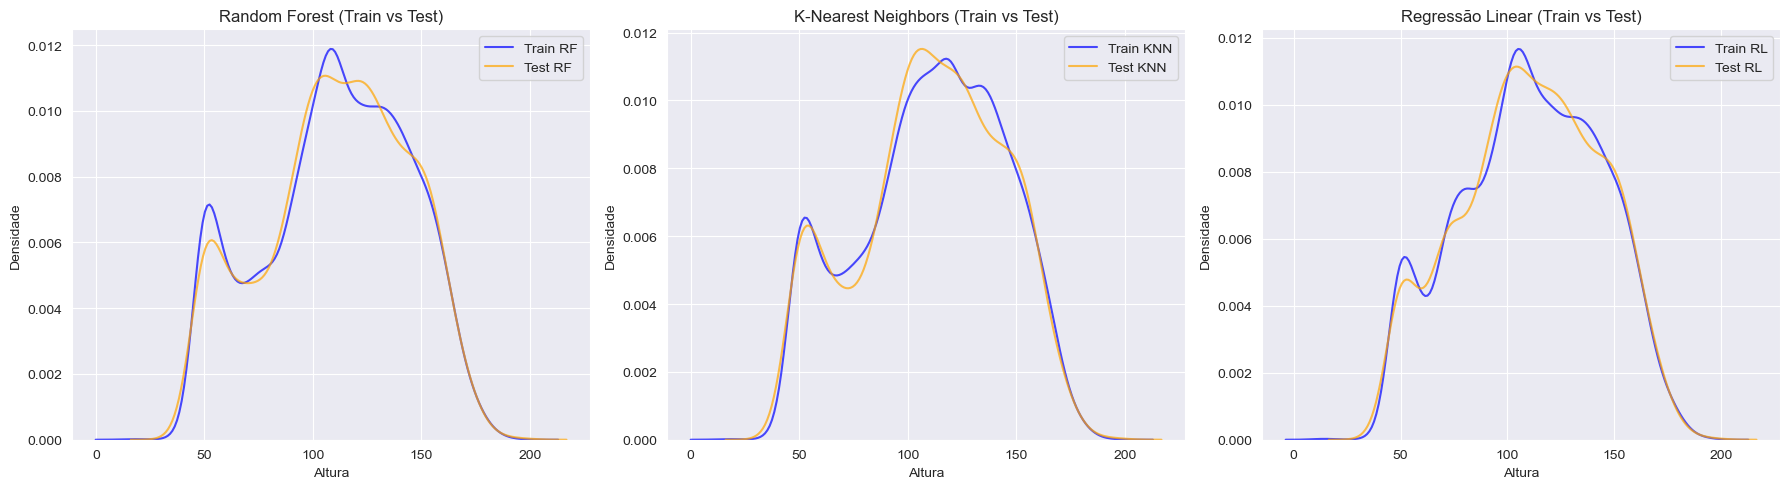

In [30]:
# Criando uma figura com 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Random Forest
sns.kdeplot(data_aux_train_rf['altura'], color='blue', label='Train RF', alpha=0.7, ax=ax[0])
sns.kdeplot(data_aux_test_rf['altura'], color='orange', label='Test RF', alpha=0.7, ax=ax[0])
ax[0].set_title('Random Forest (Train vs Test)')
ax[0].set_xlabel('Altura')
ax[0].set_ylabel('Densidade')
ax[0].legend()

# Gráfico 2: K-Nearest Neighbors (KNN)
sns.kdeplot(data_aux_train_knn['altura'], color='blue', label='Train KNN', alpha=0.7, ax=ax[1])
sns.kdeplot(data_aux_test_knn['altura'], color='orange', label='Test KNN', alpha=0.7, ax=ax[1])
ax[1].set_title('K-Nearest Neighbors (Train vs Test)')
ax[1].set_xlabel('Altura')
ax[1].set_ylabel('Densidade')
ax[1].legend()

# Gráfico 3: Regressão Linear
sns.kdeplot(data_aux_train_rl['altura'], color='blue', label='Train RL', alpha=0.7, ax=ax[2])
sns.kdeplot(data_aux_test_rl['altura'], color='orange', label='Test RL', alpha=0.7, ax=ax[2])
ax[2].set_title('Regressão Linear (Train vs Test)')
ax[2].set_xlabel('Altura')
ax[2].set_ylabel('Densidade')
ax[2].legend()

# Ajustando o layout
plt.tight_layout()
plt.show()

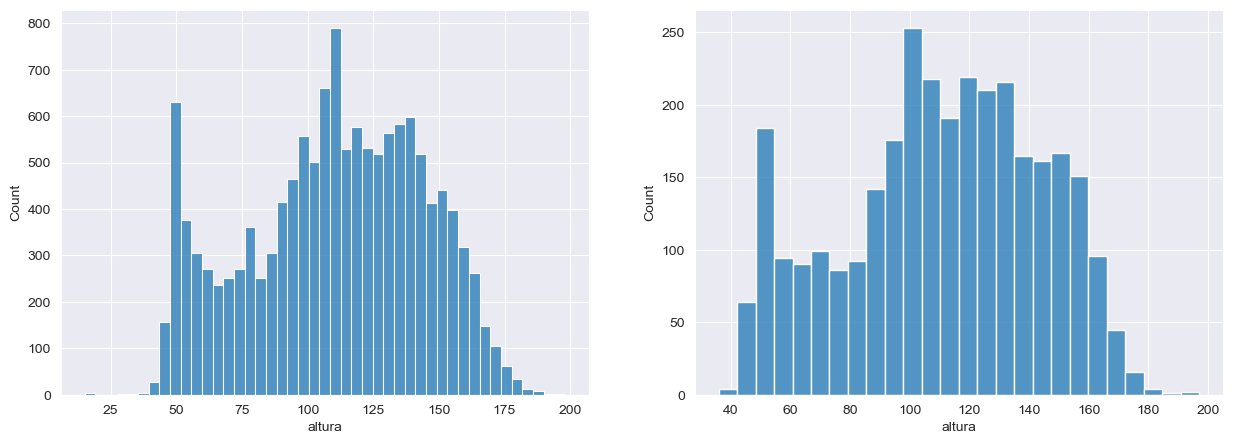

In [31]:
# apos analisar os graficos, o metodo de preenchimento de altura que mais se assemelha com data_test é o preenchimento com random forest
# então vamos usar esse metodo para preencher os valores 0 de altura em data_train e data_test
data_train['altura'] = data_aux_train_rf['altura']
data_test['altura'] = data_aux_test_rf['altura']

#removendo linhas onde altura é nula
data_train = data_train.dropna(subset=['altura'])

#vendo a distribuicao de altura ao lado de data_test e data_train
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['altura'], ax=ax[0])
sns.histplot(data_test['altura'], ax=ax[1])
plt.show()



### continuando com peso

In [32]:
data_aux_train_knn_peso = data_train.copy()
data_aux_train_knn_peso = pre.preencher_peso_knn(data_aux_train_knn_peso)

data_aux_test_knn_peso = data_test.copy()
data_aux_test_knn_peso = pre.preencher_peso_knn(data_aux_test_knn_peso)


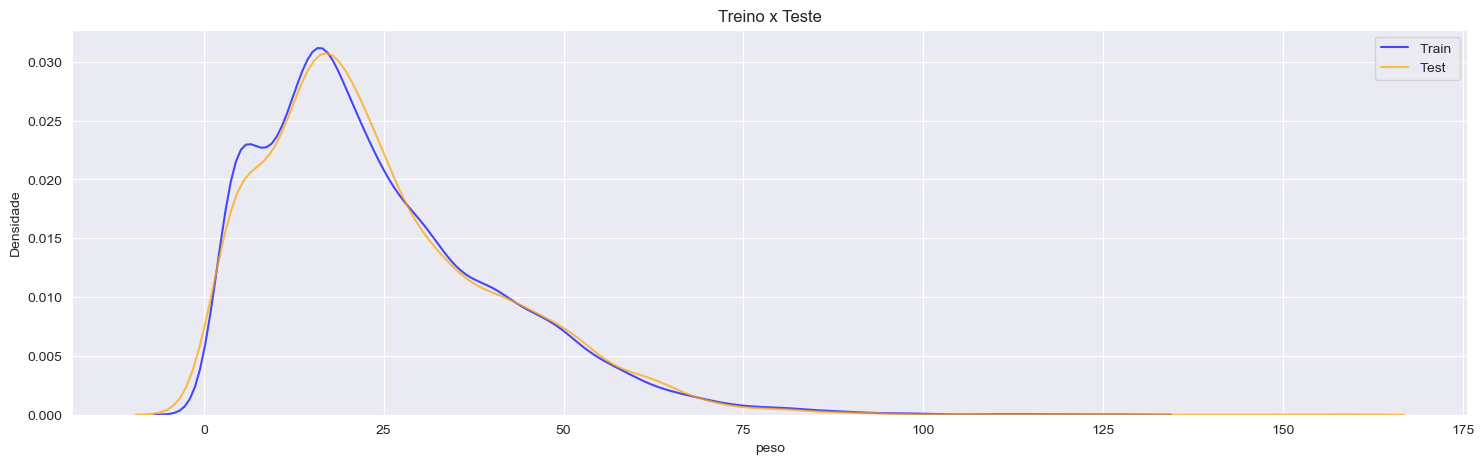

In [134]:
pre.plot_train_vs_test(data_aux_train_knn_peso,data_aux_test_knn_peso,'peso')

In [33]:
#removendo outliers de peso em data_train
data_aux_train_knn_peso = pre.remove_outliers(data_aux_train_knn_peso, 'peso')

#substituindo outliers de peso em data_test pela mediana
data_aux_test_knn_peso = pre.replace_outliers_with_median(data_aux_test_knn_peso, 'peso')


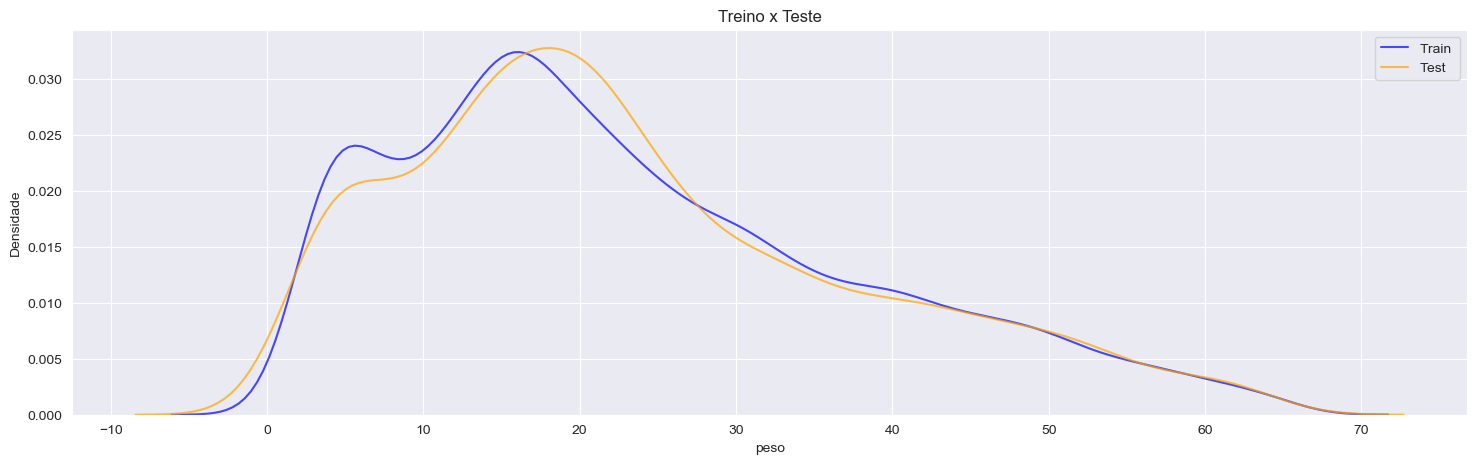

In [136]:
pre.plot_train_vs_test(data_aux_train_knn_peso,data_aux_test_knn_peso,'peso')


In [34]:
data_aux_train_rl_peso = data_train[[ 'peso', 'sexo', 'idade', 'altura']].copy()
data_aux_train_rl_peso = pre.preencher_peso_regressao_linear(data_aux_train_rl_peso)

data_aux_test_rl_peso = data_test[[ 'peso', 'sexo', 'idade', 'altura']].copy()
data_aux_test_rl_peso = pre.preencher_peso_regressao_linear(data_aux_test_rl_peso)


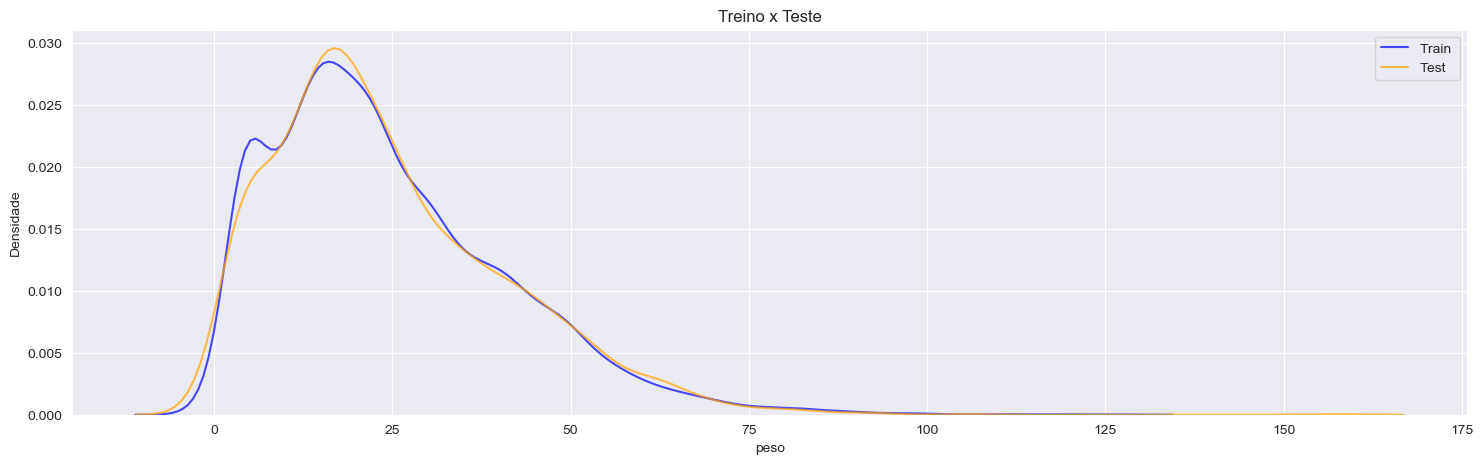

In [138]:
pre.plot_train_vs_test(data_aux_train_rl_peso,data_aux_test_rl_peso,'peso')


In [35]:
#removendo outliers de peso em data_train
data_aux_train_rl_peso = pre.remove_outliers(data_aux_train_rl_peso, 'peso')

#substituindo outliers de peso em data_test pela mediana
data_aux_test_rl_peso = pre.replace_outliers_with_median(data_aux_test_rl_peso, 'peso')

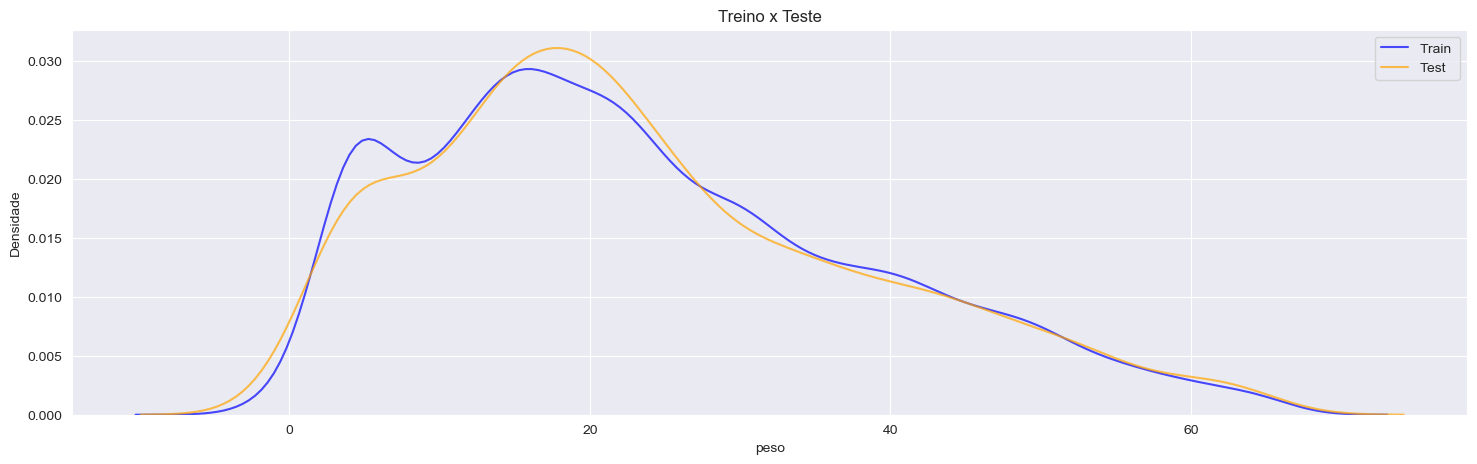

In [140]:
pre.plot_train_vs_test(data_aux_train_rl_peso,data_aux_test_rl_peso,'peso')


In [36]:
data_aux_train_rf_peso = data_train[[ 'peso', 'sexo', 'idade', 'altura']].copy()
data_aux_train_rf_peso = pre.preencher_peso_randomForest(data_aux_train_rf_peso)

data_aux_test_rf_peso = data_test[[ 'peso', 'sexo', 'idade', 'altura']].copy()
data_aux_test_rf_peso = pre.preencher_peso_randomForest(data_aux_test_rf_peso)

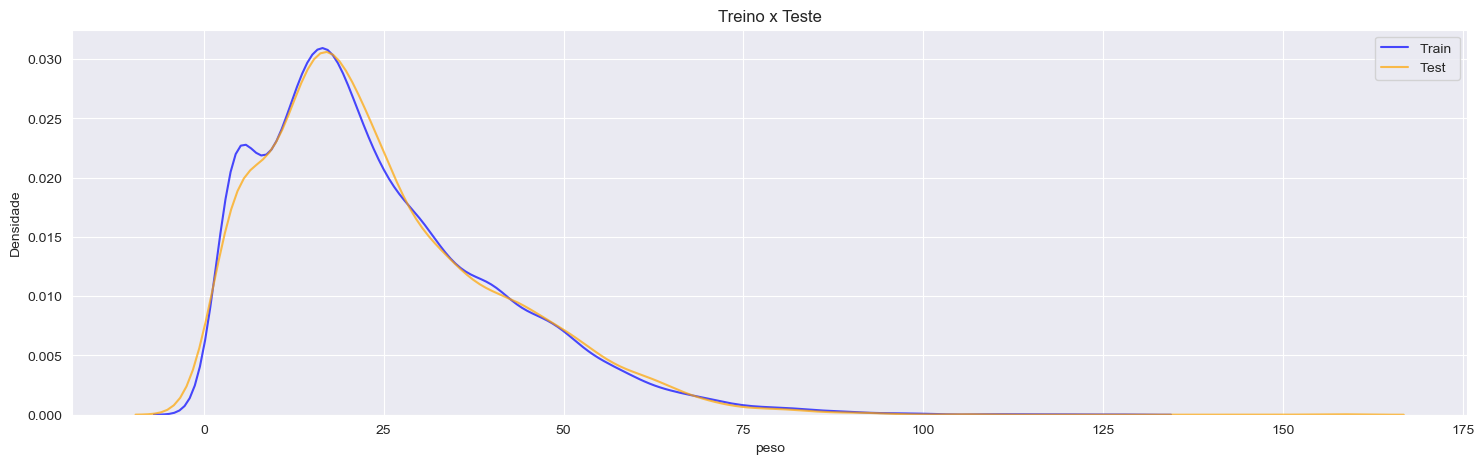

In [142]:
pre.plot_train_vs_test(data_aux_train_rf_peso,data_aux_test_rf_peso,'peso')


In [37]:
#removendo outliers de peso em data_train
data_aux_train_rf_peso = pre.remove_outliers(data_aux_train_rf_peso, 'peso')

#substituindo outliers de peso em data_test pela mediana
data_aux_test_rf_peso = pre.replace_outliers_with_median(data_aux_test_rf_peso, 'peso')

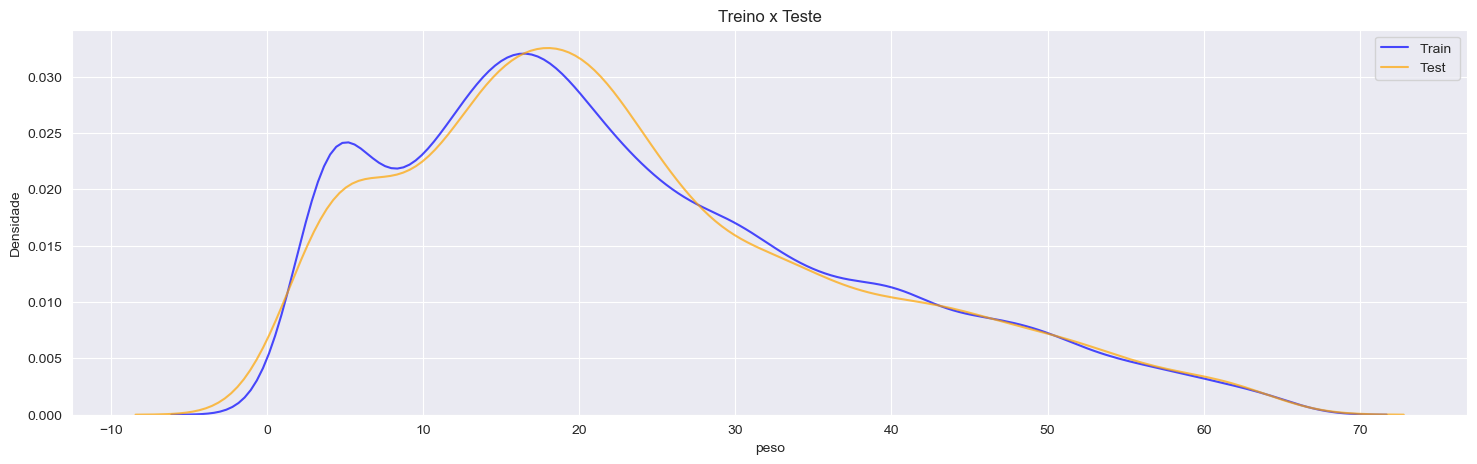

In [144]:
pre.plot_train_vs_test(data_aux_train_rf_peso,data_aux_test_rf_peso,'peso')


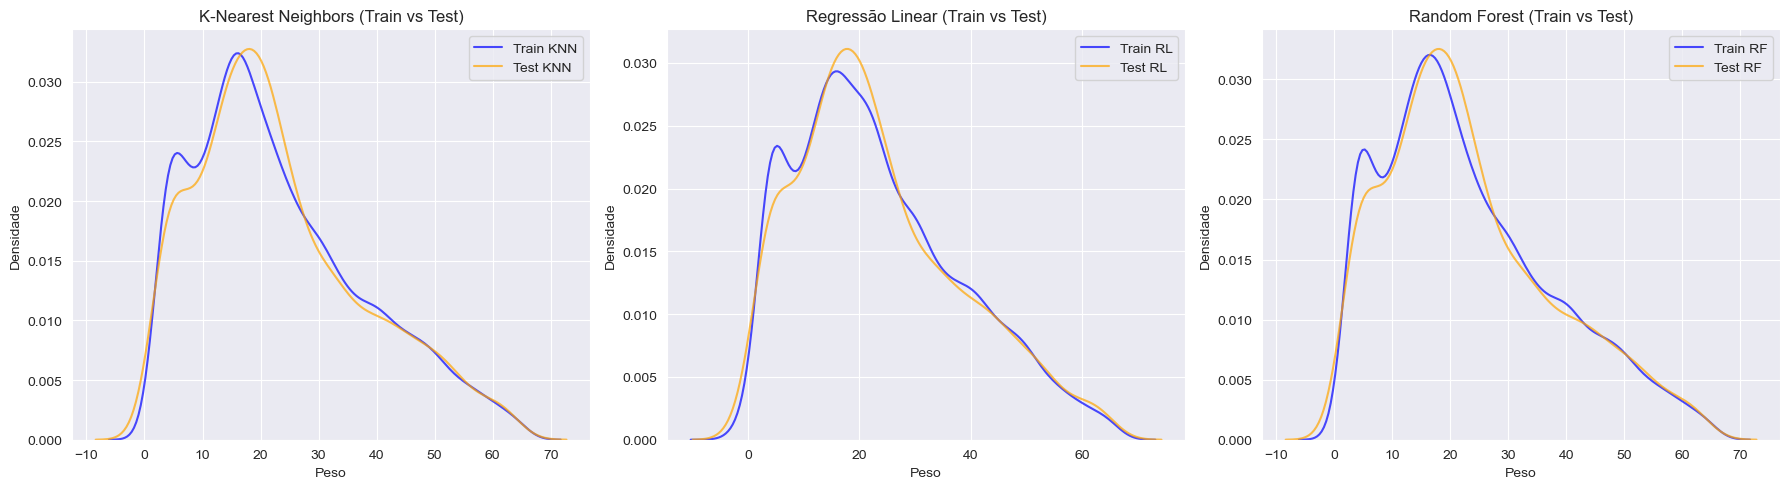

In [38]:

# Criando uma figura com 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: K-Nearest Neighbors (KNN)
sns.kdeplot(data_aux_train_knn_peso['peso'], color='blue', label='Train KNN', alpha=0.7, ax=ax[0])
sns.kdeplot(data_aux_test_knn_peso['peso'], color='orange', label='Test KNN', alpha=0.7, ax=ax[0])
ax[0].set_title('K-Nearest Neighbors (Train vs Test)')
ax[0].set_xlabel('Peso')
ax[0].set_ylabel('Densidade')
ax[0].legend()

# Gráfico 2: Regressão Linear
sns.kdeplot(data_aux_train_rl_peso['peso'], color='blue', label='Train RL', alpha=0.7, ax=ax[1])
sns.kdeplot(data_aux_test_rl_peso['peso'], color='orange', label='Test RL', alpha=0.7, ax=ax[1])
ax[1].set_title('Regressão Linear (Train vs Test)')
ax[1].set_xlabel('Peso')
ax[1].set_ylabel('Densidade')
ax[1].legend()

# Gráfico 3: Random Forest
sns.kdeplot(data_aux_train_rf_peso['peso'], color='blue', label='Train RF', alpha=0.7, ax=ax[2])
sns.kdeplot(data_aux_test_rf_peso['peso'], color='orange', label='Test RF', alpha=0.7, ax=ax[2])
ax[2].set_title('Random Forest (Train vs Test)')
ax[2].set_xlabel('Peso')
ax[2].set_ylabel('Densidade')
ax[2].legend()

# Ajustando o layout
plt.tight_layout()
plt.show()

In [39]:
# ao analisar os graficos, é possivel perceber que o metodo de preenchimento de peso que mais se assemelha com data_test é o preenchimento com regressao linear
# então vamos usar esse metodo para preencher os valores 0 de peso em data_train e data_test
data_train['peso'] = data_aux_train_rl_peso['peso'].copy()
data_test['peso'] = data_aux_test_rl_peso['peso'].copy()

#removendo linhas onde peso é nulo
data_train = data_train.dropna(subset=['peso'])

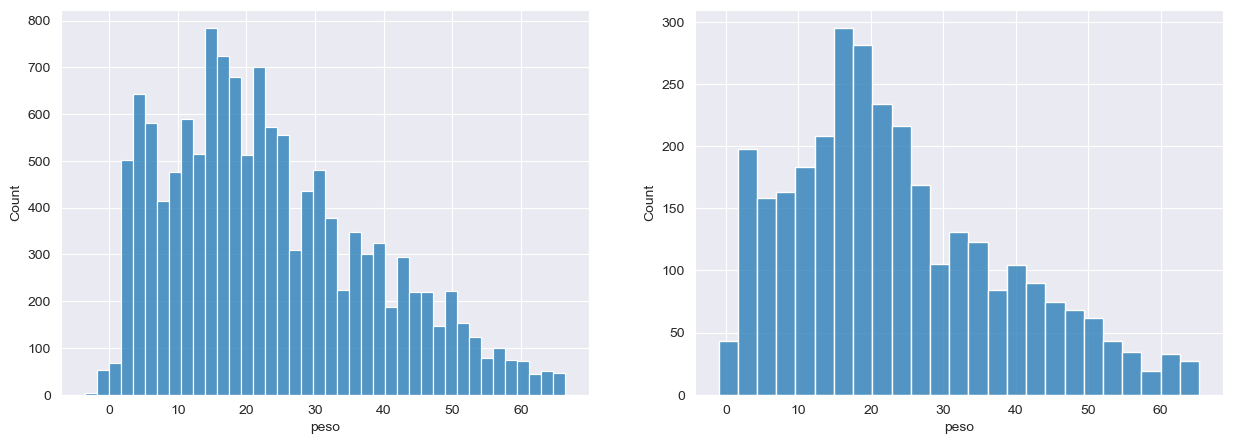

In [147]:
#vendo a distribuicao de peso ao lado de data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['peso'], ax=ax[0])
sns.histplot(data_test['peso'], ax=ax[1])
plt.show()

### continuando com imc

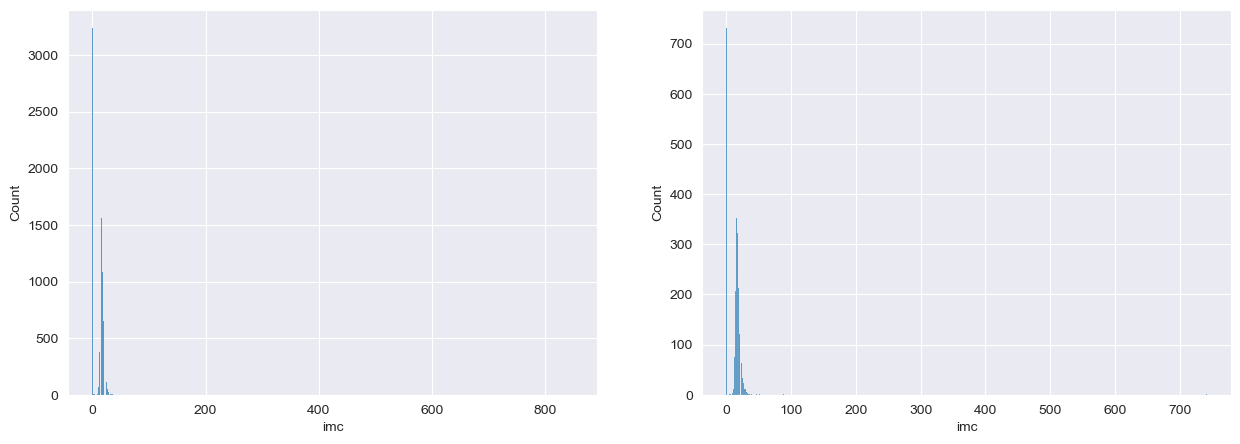

In [148]:
#criando 2 graficos um ao lado do outro para comparar o imc de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['imc'], ax=ax[0])
sns.histplot(data_test['imc'], ax=ax[1])
plt.show()

In [40]:
data_aux_train_imc = pre.recalcular_imc(data_train)

data_aux_test_imc = pre.recalcular_imc(data_test)


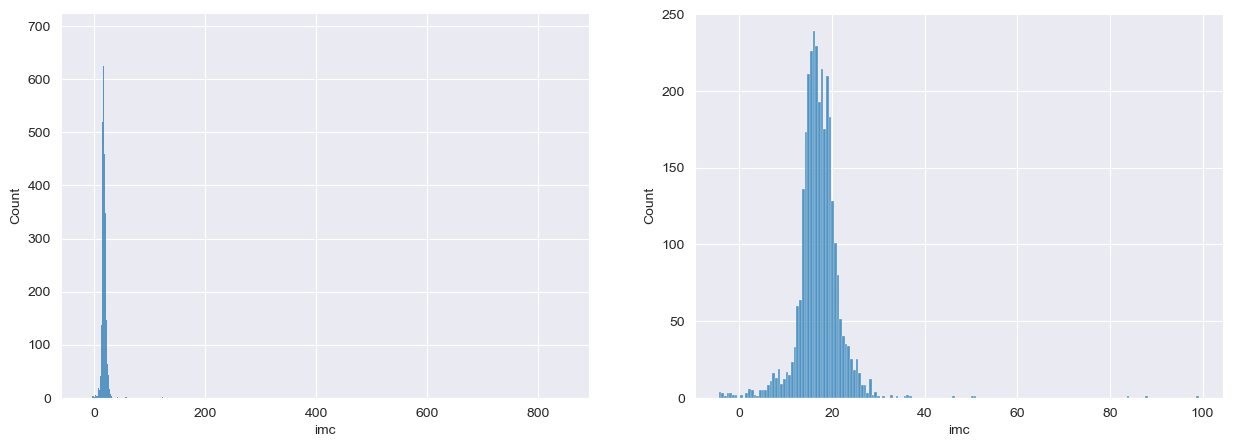

In [150]:
#analisando a distribuicao de imc em data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_aux_train_imc['imc'], ax=ax[0])
sns.histplot(data_aux_test_imc['imc'], ax=ax[1])
plt.show()


In [41]:
#removendo outliers de imc em data_train
data_aux_train_imc = pre.remove_outliers(data_aux_train_imc, 'imc')

#substituindo outliers de imc em data_test pela mediana
data_aux_test_imc = pre.replace_outliers_with_median(data_aux_test_imc, 'imc')



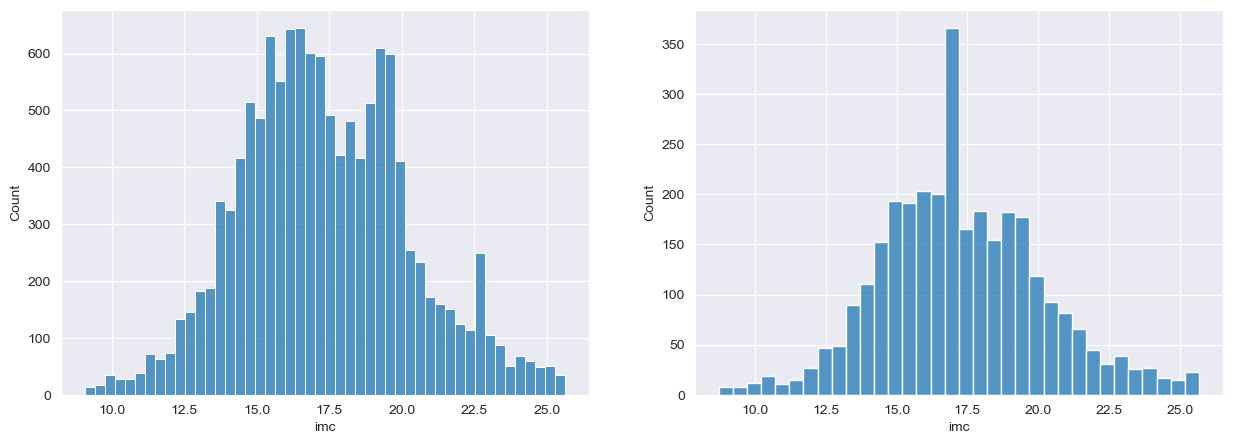

In [152]:
# criando 2 graficos um ao lado do outro para comparar o imc de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_aux_train_imc['imc'], ax=ax[0])
sns.histplot(data_aux_test_imc['imc'], ax=ax[1])
plt.show()

In [42]:
# substituindo os valores de data_train e data_test pelo imc recalculado
data_train['imc'] = data_aux_train_imc['imc']
data_test['imc'] = data_aux_test_imc['imc']

#removendo linhas onde imc é nulo
data_train = data_train.dropna(subset=['imc'])

In [43]:
data_aux_train_faixa_imc = pre.criar_faixa_imc(data_train)

data_aux_test_faixa_imc = pre.criar_faixa_imc(data_test)



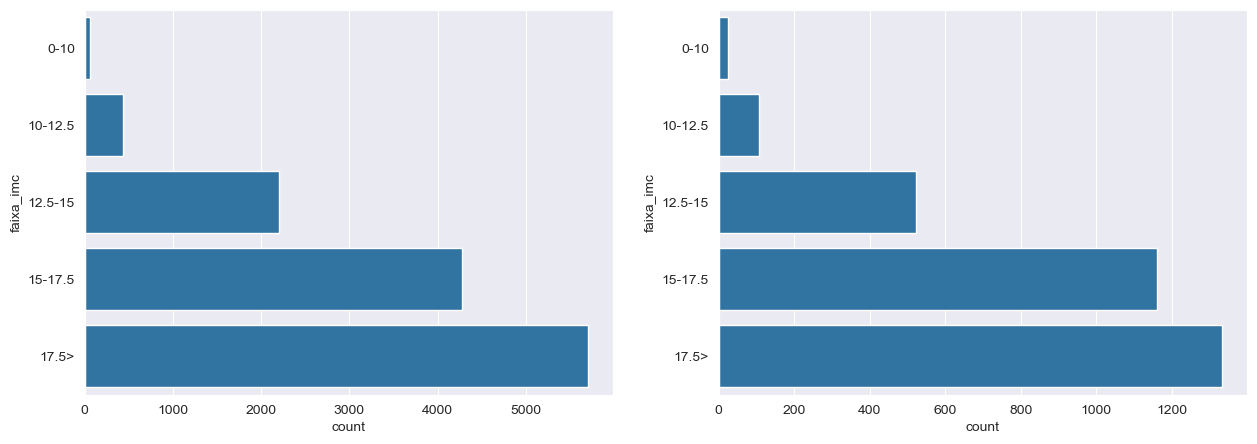

In [155]:
#analisando a distribuicao de faixa_imc em data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data_aux_train_faixa_imc['faixa_imc'], ax=ax[0])
sns.countplot(data_aux_test_faixa_imc['faixa_imc'], ax=ax[1])
plt.show()

In [44]:
# apos analisar a distribuicao de faixa_imc, é possivel perceber que a distribuicao de data_train e data_test é bem parecida
# entao vamos usar a faixa_imc em data_train e data_test
data_train['faixa_imc'] = data_aux_train_faixa_imc['faixa_imc']
data_test['faixa_imc'] = data_aux_test_faixa_imc['faixa_imc']

### continuando fc


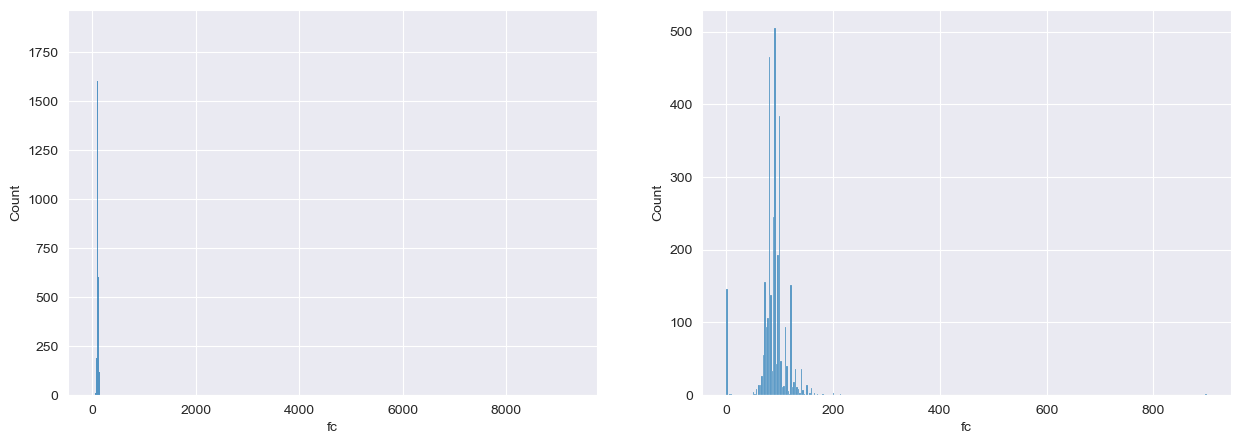

In [157]:
# criando 2 graficos um ao lado do outro para comparar a fc de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['fc'], ax=ax[0])
sns.histplot(data_test['fc'], ax=ax[1])
plt.show()

In [45]:
#removendo outliers de fc em data_train
data_train = pre.remove_outliers(data_train, 'fc')

#substituindo outliers de fc em data_test pela mediana
data_test = pre.replace_outliers_with_median(data_test, 'fc')


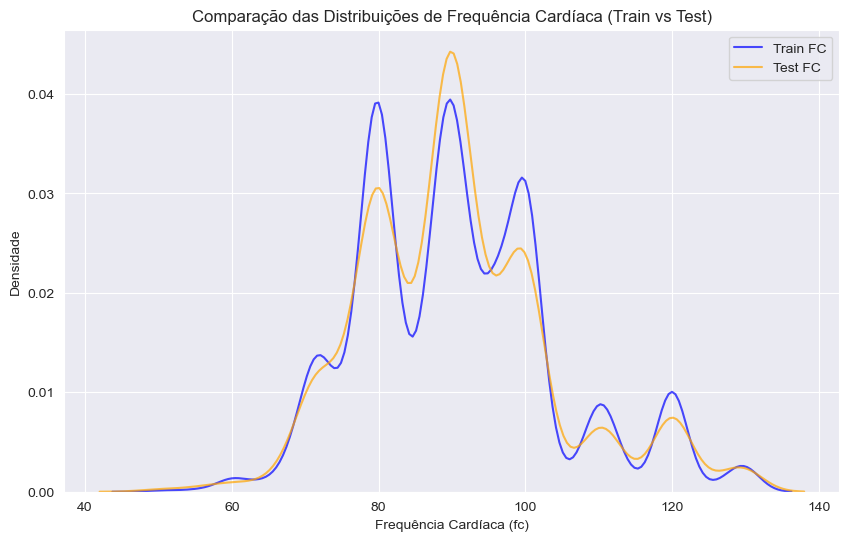

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um único gráfico para comparar as distribuições de fc
plt.figure(figsize=(10, 6))

# Plotando as densidades (KDE) de data_train e data_test
sns.kdeplot(data_train['fc'], color='blue', label='Train FC', alpha=0.7)
sns.kdeplot(data_test['fc'], color='orange', label='Test FC', alpha=0.7)

# Adicionando legendas e título
plt.legend()
plt.title('Comparação das Distribuições de Frequência Cardíaca (Train vs Test)')
plt.xlabel('Frequência Cardíaca (fc)')
plt.ylabel('Densidade')
plt.show()

### continuando com pa_sistolica e diastolica


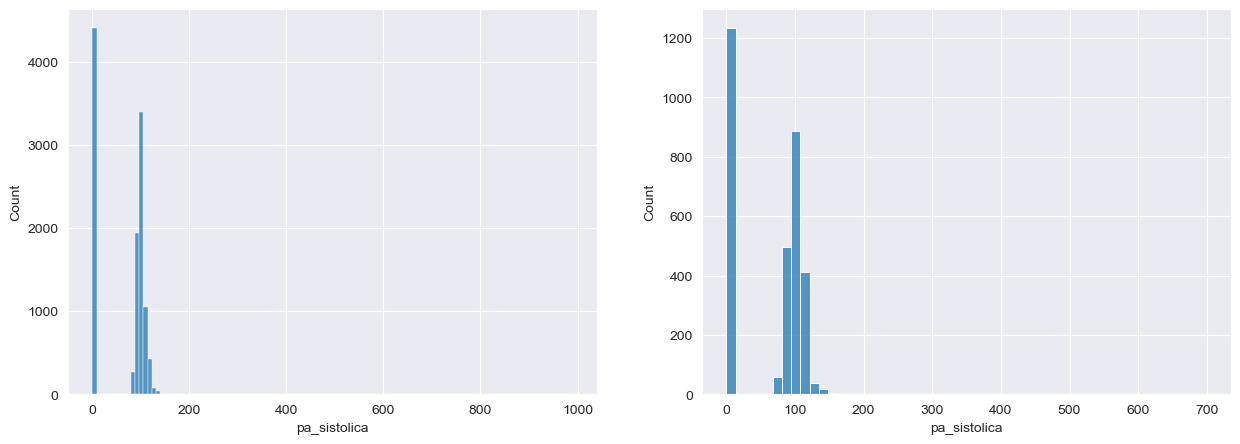

In [160]:
#criando 2 graficos um ao lado do outro para comparar a pa_sistolica de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['pa_sistolica'], ax=ax[0])
sns.histplot(data_test['pa_sistolica'], ax=ax[1])
plt.show()

In [47]:
#removendo outliers de pa_sistolica em data_train
data_train = pre.remove_outliers(data_train, 'pa_sistolica')

#substituindo outliers de pa_sistolica em data_test pela mediana
data_test = pre.replace_outliers_with_median(data_test, 'pa_sistolica')


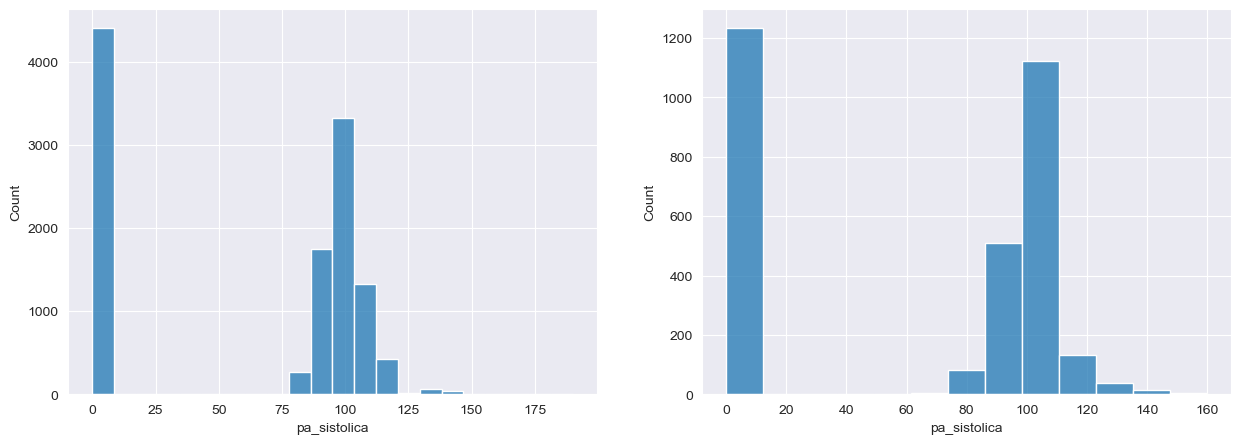

In [162]:
# criando 2 graficos um ao lado do outro para comparar a pa_sistolica de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['pa_sistolica'], ax=ax[0])
sns.histplot(data_test['pa_sistolica'], ax=ax[1])
plt.show()

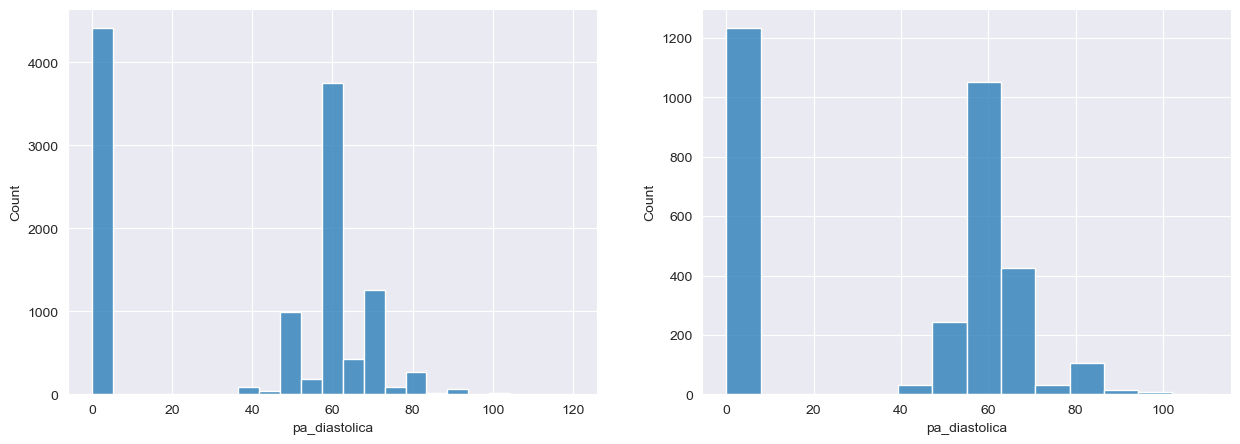

In [163]:
#criando 2 graficos um ao lado do outro para comparar a pa_sistolica de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['pa_diastolica'], ax=ax[0])
sns.histplot(data_test['pa_diastolica'], ax=ax[1])
plt.show()

In [48]:
#removendo outliers de pa_sistolica em data_train
data_train = pre.remove_outliers(data_train, 'pa_diastolica')

#substituindo outliers de pa_sistolica em data_test pela mediana
data_test = pre.replace_outliers_with_median(data_test, 'pa_diastolica')


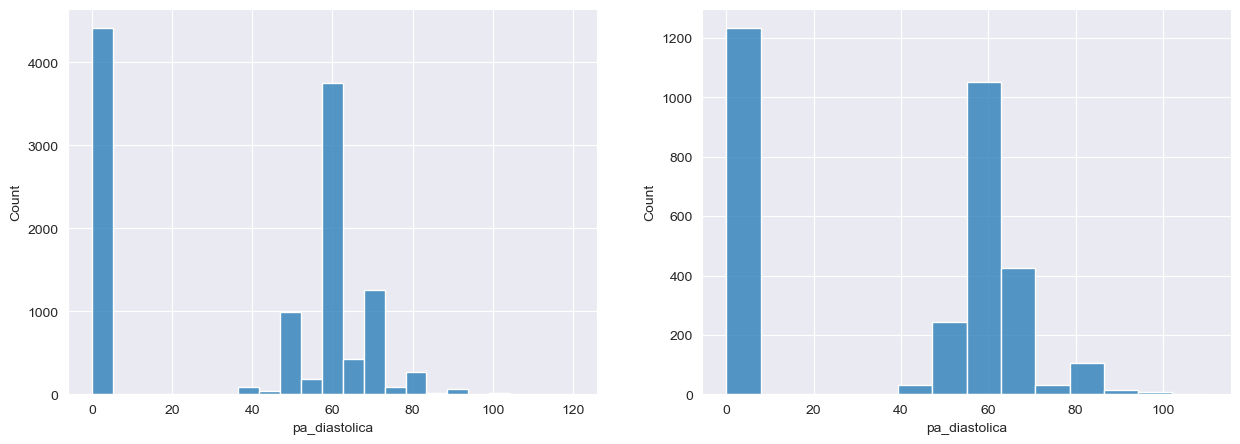

In [165]:
#criando 2 graficos um ao lado do outro para comparar a pa_sistolica de data_train e data_test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_train['pa_diastolica'], ax=ax[0])
sns.histplot(data_test['pa_diastolica'], ax=ax[1])
plt.show()

In [49]:
# preenchendo os valores 0 de pa_sistolica e pa_diastolica com a mediana
data_train['pa_sistolica'] = data_train['pa_sistolica'].apply(lambda x: data_train['pa_sistolica'].median() if x == 0 else x)

data_train['pa_diastolica'] = data_train['pa_diastolica'].apply(lambda x: data_train['pa_diastolica'].median() if x == 0 else x)

data_test['pa_sistolica'] = data_test['pa_sistolica'].apply(lambda x: data_test['pa_sistolica'].median() if x == 0 else x)

data_test['pa_diastolica'] = data_test['pa_diastolica'].apply(lambda x: data_test['pa_diastolica'].median() if x == 0 else x)

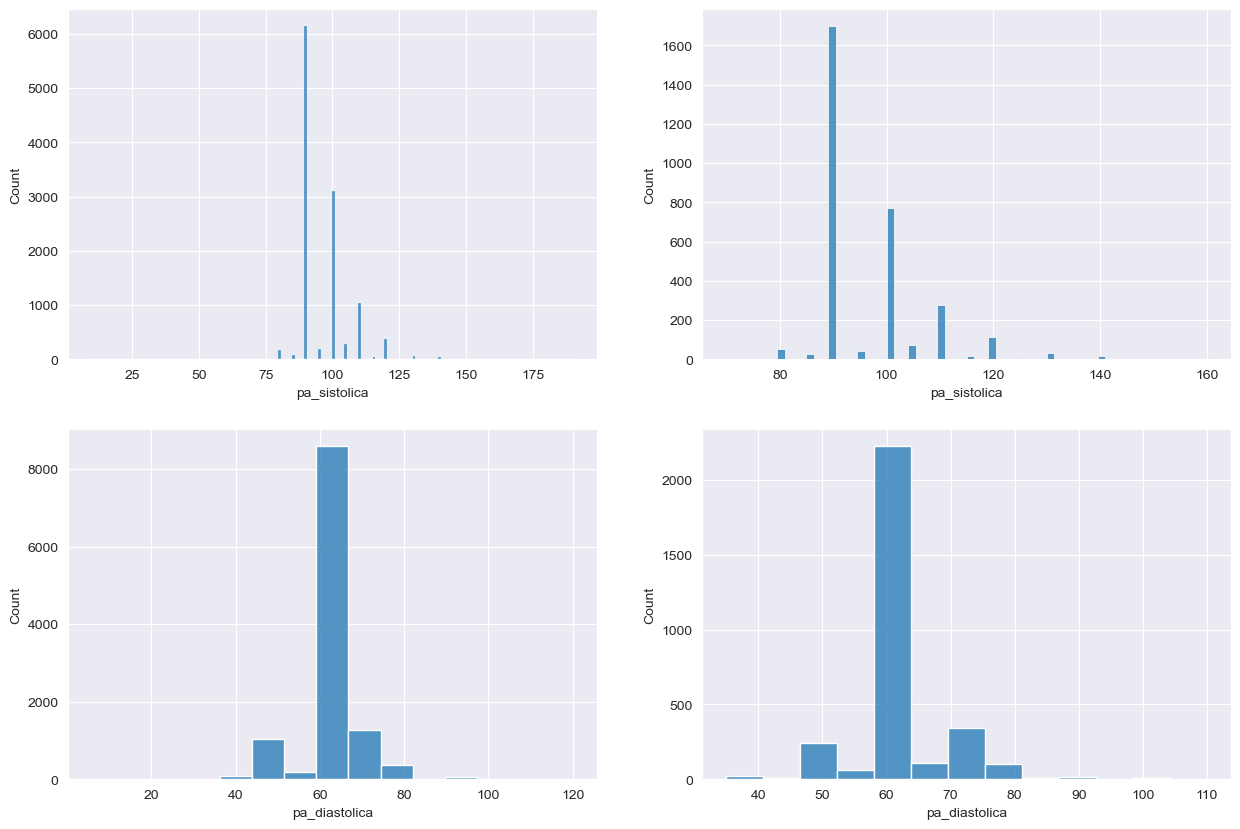

In [167]:
#criando 4 graficos um ao lado do outro para comparar a pa_sistolicae  diastolica de data_train e data_test
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data_train['pa_sistolica'], ax=ax[0, 0])
sns.histplot(data_test['pa_sistolica'], ax=ax[0, 1])
sns.histplot(data_train['pa_diastolica'], ax=ax[1, 0])
sns.histplot(data_test['pa_diastolica'], ax=ax[1, 1])
plt.show()


### tratando colunas categoricos


In [50]:
# se a categoria tiver menos de 100 ocorrencias, substituir por 'outros'
for col in cols_categoricas:
    data_train[col] = data_train[col].apply(lambda x: 'outros' if data_train[col].value_counts()[x] < 300 else x)
    data_test[col] = data_test[col].apply(lambda x: 'outros' if data_test[col].value_counts()[x] < 100 else x)

In [51]:
#se a coluna tiver o nome outro, nao informado ou ausente, substituir por 'outros'
for col in cols_categoricas:
    data_train[col] = data_train[col].apply(lambda x: 'outros' if x in ['outro', 'nao informado', 'ausente', '7 - outro'] else x)
    data_test[col] = data_test[col].apply(lambda x: 'outros' if x in ['outro', 'nao informado', 'ausente', '7 - outro'] else x)

In [170]:
#analisar distribuicao das colunas categoricas de data_train
ae.analisar_distribuicao(data_train, cols_categoricas)


Distribuição de classes na coluna 'pulsos':
pulsos
normais    11540
outros        93
Name: count, dtype: int64


Distribuição de classes na coluna 'ppa':
ppa
não calculado    5865
normal           4515
outros           1253
Name: count, dtype: int64


Distribuição de classes na coluna 'b2':
b2
normal    11202
outros      431
Name: count, dtype: int64


Distribuição de classes na coluna 'sexo':
sexo
m         6529
f         4658
outros     446
Name: count, dtype: int64


Distribuição de classes na coluna 'sopro':
sopro
outros       7587
sistólico    4046
Name: count, dtype: int64


Distribuição de classes na coluna 'hda_1':
hda_1
assintomático     6659
outros            3412
dor precordial     633
dispneia           510
palpitacao         419
Name: count, dtype: int64


Distribuição de classes na coluna 'motivo_1':
motivo_1
5 - parecer cardiológico           5615
6 - suspeita de cardiopatia        3916
1 - cardiopatia já estabelecida     858
2 - check-up                        694
outro

In [171]:
# analisar distribuicao das colunas categoricas de data_test
ae.analisar_distribuicao(data_test, cols_categoricas)

Distribuição de classes na coluna 'pulsos':
pulsos
normais    3114
outros       32
Name: count, dtype: int64


Distribuição de classes na coluna 'ppa':
ppa
não calculado    1711
normal           1224
outros            211
Name: count, dtype: int64


Distribuição de classes na coluna 'b2':
b2
normal    3018
outros     128
Name: count, dtype: int64


Distribuição de classes na coluna 'sexo':
sexo
m         1795
f         1265
outros      86
Name: count, dtype: int64


Distribuição de classes na coluna 'sopro':
sopro
outros       2019
sistólico    1127
Name: count, dtype: int64


Distribuição de classes na coluna 'hda_1':
hda_1
assintomático     1777
outros             965
dor precordial     174
dispneia           130
palpitacao         100
Name: count, dtype: int64


Distribuição de classes na coluna 'motivo_1':
motivo_1
5 - parecer cardiológico           1489
6 - suspeita de cardiopatia        1065
1 - cardiopatia já estabelecida     291
2 - check-up                        206
outros   

In [52]:
#transformando as colunas categoricas em dummies
data_train = pd.get_dummies(data_train, columns=cols_categoricas+['faixa_imc'])
data_test = pd.get_dummies(data_test, columns=cols_categoricas+ ['faixa_imc'])


### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [53]:
#separando x_train e y_train
x_train = data_train.drop(columns=['id', 'CLASSE'])
y_train = data_train['CLASSE']

In [174]:
data_test.head()

,id,peso,altura,imc,idade,pa_sistolica,pa_diastolica,fc,pulsos_normais,pulsos_outros,...,motivo_2_5 - cirurgia,motivo_2_6 - dor precordial,motivo_2_6 - palpitação/taquicardia/arritmia,motivo_2_6 - sopro,motivo_2_outros,faixa_imc_0-10,faixa_imc_10-12.5,faixa_imc_12.5-15,faixa_imc_15-17.5,faixa_imc_17.5>
0,8957,4.5,54.000000,15.432099,0.15,90.0,60.0,110.0,True,False,...,False,False,False,False,True,False,False,False,True,False
1,4246,42.4,150.000000,18.844444,12.43,90.0,60.0,84.0,True,False,...,False,False,False,False,False,False,False,False,False,True
2,9089,18.1,104.000000,16.734467,3.82,130.0,90.0,100.0,True,False,...,False,False,False,False,True,False,False,False,True,False
3,10606,7.7,68.140000,16.583892,0.73,90.0,60.0,98.0,True,False,...,False,False,False,False,False,False,False,False,True,False
4,9863,16.0,101.486667,15.534669,3.99,90.0,60.0,90.0,True,False,...,True,False,False,False,False,False,False,False,True,False


In [54]:
x_test = data_test.drop(columns=['id'])

In [176]:
#vendo a distribuicao de y_train
y_train.value_counts()

CLASSE
Normal     7117
Anormal    4515
Normais       1
Name: count, dtype: int64

In [55]:
#substituindo Normais por Normal
y_train = y_train.apply(lambda x: 'Normal' if x == 'Normais' else x)

In [178]:
#vendo a distribuicao de y_train
y_train.value_counts()

CLASSE
Normal     7118
Anormal    4515
Name: count, dtype: int64

In [56]:
#usando dummies para as colunas categoricas de y_train
y_train = pd.get_dummies(y_train)


In [180]:
#vendo a distribuicao de y_train
y_train.value_counts()


Anormal  Normal
False    True      7118
True     False     4515
Name: count, dtype: int64

In [57]:


# Definição do param_grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [58]:
#com todas as colunas
resultados = exp.testar_combinacoes_features(x_train, y_train, [], param_grid)

# Exibir os resultados
for combo, acuracia in resultados.items():
    print(f"Combinação de colunas excluídas: {combo}, Acurácia no conjunto de treino: {acuracia:.4f}")

Combinação de colunas excluídas: [], Acurácia no conjunto de treino: 0.9373


In [184]:
# Definir os grupos de colunas
grupos = [
    ['ppa_normal', 'ppa_não calculado', 'ppa_outros'],  # Grupo ppa
    ['sexo_f', 'sexo_m', 'sexo_outros'],  # Grupo sexo
    [
        'motivo_1_1 - cardiopatia já estabelecida', 'motivo_1_2 - check-up',
        'motivo_1_5 - parecer cardiológico', 'motivo_1_6 - suspeita de cardiopatia', 'motivo_1_outros'
    ],  # Grupo motivo_1
    [
        'motivo_2_1 - cardiopatia congenica', 'motivo_2_5 - atividade física',
        'motivo_2_5 - cirurgia', 'motivo_2_6 - dor precordial', 'motivo_2_6 - palpitação/taquicardia/arritmia',
        'motivo_2_6 - sopro', 'motivo_2_outros'
    ]  ,# Grupo motivo_2
        ['faixa_imc_0-10', 'faixa_imc_10-12.5', 'faixa_imc_12.5-15', 'faixa_imc_15-17.5', 'faixa_imc_17.5>']  # Testar sem as colunas de 'faixa_imc'
    ,['imc']

]

# Gerar todas as combinações possíveis de grupos
resultados = {}
for r in range(1, len(grupos) + 1):  # r é o número de grupos a serem excluídos
    for grupos_excluidos in combinations(grupos, r):  # Todas as combinações de tamanho r
        result = exp.testar_combinacoes_features(x_train, y_train, grupos_excluidos, param_grid)
        resultados.update(result)

# Exibir resultados
for combo, acuracia in resultados.items():
    print(f"Combinação de grupos excluídos: {combo}, Acurácia no conjunto de treino: {acuracia:.4f}")

Combinação de grupos excluídos: (['ppa_normal', 'ppa_não calculado', 'ppa_outros'],), Acurácia no conjunto de treino: 0.9378
Combinação de grupos excluídos: (['sexo_f', 'sexo_m', 'sexo_outros'],), Acurácia no conjunto de treino: 0.9396
Combinação de grupos excluídos: (['motivo_1_1 - cardiopatia já estabelecida', 'motivo_1_2 - check-up', 'motivo_1_5 - parecer cardiológico', 'motivo_1_6 - suspeita de cardiopatia', 'motivo_1_outros'],), Acurácia no conjunto de treino: 0.9389
Combinação de grupos excluídos: (['motivo_2_1 - cardiopatia congenica', 'motivo_2_5 - atividade física', 'motivo_2_5 - cirurgia', 'motivo_2_6 - dor precordial', 'motivo_2_6 - palpitação/taquicardia/arritmia', 'motivo_2_6 - sopro', 'motivo_2_outros'],), Acurácia no conjunto de treino: 0.9373
Combinação de grupos excluídos: (['faixa_imc_0-10', 'faixa_imc_10-12.5', 'faixa_imc_12.5-15', 'faixa_imc_15-17.5', 'faixa_imc_17.5>'],), Acurácia no conjunto de treino: 0.9373
Combinação de grupos excluídos: (['imc'],), Acurácia no

### entao, testando varios modelos mas removendo sexo, motivo1 e motivo2


In [59]:
#colunas que se tiradas deixam o modelo melhor
cols_drop=['sexo_f', 'sexo_m', 'sexo_outros' ,'motivo_1_1 - cardiopatia já estabelecida', 'motivo_1_2 - check-up', 'motivo_1_5 - parecer cardiológico', 'motivo_1_6 - suspeita de cardiopatia', 'motivo_1_outros','motivo_2_1 - cardiopatia congenica', 'motivo_2_5 - atividade física', 'motivo_2_5 - cirurgia', 'motivo_2_6 - dor precordial', 'motivo_2_6 - palpitação/taquicardia/arritmia', 'motivo_2_6 - sopro', 'motivo_2_outros']

x_train = x_train.drop(columns=cols_drop)

In [60]:
x_test = x_test.drop(columns=cols_drop)


In [262]:
y_train.head()

,Anormal,Normal
0,False,True
1,True,False
2,True,False
3,False,True
4,False,True


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
y_train['Classe'] = np.where(y_train['Anormal'] == True, 1, 0)


In [62]:
y_train.drop(columns=['Normal', 'Anormal'], inplace=True)


In [63]:
# Certifique-se de que y_train é um array unidimensional
y_train = y_train.to_numpy().ravel()

In [64]:
def evaluate_logistic_regression():
    model = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy'))

def evaluate_random_forest():
    model = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy'))

def evaluate_xgboost():
    model = XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42)
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy'))

def evaluate_lightgbm():
    X_train_fixed = x_train.rename(columns=lambda x: x.replace(" ", "_"))

    model = LGBMClassifier(random_state=42, verbose=-1)
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [-1, 10, 20]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_fixed, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train_fixed, y_train, cv=5, scoring='accuracy'))

def evaluate_catboost():
    model = CatBoostClassifier(verbose=0, random_state=42)
    param_grid = {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [4, 6, 8]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy'))

def evaluate_knn():
    model = KNeighborsClassifier()
    param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy'))

def evaluate_svm():
    model = SVC(probability=True, random_state=42)
    param_grid = {'C': [ 1], 'kernel': ['linear']}
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, scoring='accuracy', n_jobs=-1, n_iter=1, random_state=42)
    randomized_search.fit(x_train, y_train)
    return randomized_search.best_estimator_, np.mean(cross_val_score(randomized_search.best_estimator_, x_train, y_train, cv=3, scoring='accuracy'))

def evaluate_neural_network():
    model = MLPClassifier(max_iter=1000, random_state=42)
    param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['tanh', 'relu'], 'alpha': [0.0001, 0.001, 0.01]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    return grid_search.best_estimator_, np.mean(cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy'))

def evaluate_naive_bayes():
    model = GaussianNB()
    return model, np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy'))

def evaluate_stacking():
    stacking = StackingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
            ("rf", RandomForestClassifier(random_state=42)),
            ("xgb", XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    )
    stacking.fit(x_train, y_train)
    return stacking, np.mean(cross_val_score(stacking, x_train, y_train, cv=5, scoring='accuracy'))

def evaluate_voting():
    voting = VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
            ("rf", RandomForestClassifier(random_state=42)),
            ("xgb", XGBClassifier(eval_metric='logloss', tree_method="hist", random_state=42))
        ],
        voting="soft"
    )
    voting.fit(x_train, y_train)
    return voting, np.mean(cross_val_score(voting, x_train, y_train, cv=5, scoring='accuracy'))

# Avaliação de cada modelo
results = {}
models = {
    "Logistic Regression": evaluate_logistic_regression,
    "Random Forest": evaluate_random_forest,
    "XGBoost": evaluate_xgboost,
    "LightGBM": evaluate_lightgbm,
    "CatBoost": evaluate_catboost,
    "KNN": evaluate_knn,
     "SVM": evaluate_svm,
    "Neural Network": evaluate_neural_network,
    "Naive Bayes": evaluate_naive_bayes,
    "Stacking": evaluate_stacking,
    "Voting": evaluate_voting
}

for name, func in models.items():
    print(f"Avaliando {name}...")
    model, mean_cv_score = func()
    results[name] = mean_cv_score

sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for model, acc in sorted_results.items():
    print(f"{model}: {acc:.4f}")

Avaliando Logistic Regression...
Avaliando Random Forest...
Avaliando XGBoost...
Avaliando LightGBM...
Avaliando CatBoost...
Avaliando KNN...
Avaliando SVM...


C:\Users\mathe\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=4. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Avaliando Neural Network...
Avaliando Naive Bayes...
Avaliando Stacking...
Avaliando Voting...
LightGBM: 0.9361
Random Forest: 0.9360
XGBoost: 0.9359
Stacking: 0.9356
SVM: 0.9355
CatBoost: 0.9354
Logistic Regression: 0.9354
Voting: 0.9350
Neural Network: 0.9329
Naive Bayes: 0.9248
KNN: 0.7009


In [69]:
#testando muitos hiperparametros para os 3 melhores modelos para tentar aumentar a acuracia
lgbm_params = {
    'n_estimators': [200],            # Valor intermediário fixo
    'learning_rate': [0.05],    # Taxas mais agressivas
    'max_depth': [5],              # Profundidade balanceada
    'num_leaves': [15],           # Evite valores muito altos
    'min_child_samples': [20],    # Reduz overfitting
    'subsample': [0.8],               # Fixo para velocidade
    'colsample_bytree': [0.8],        # Fixo
    'reg_alpha': [0.1],         # Regularização L1
}


rf_params = {
    'n_estimators': [375],       # Foco no entorno do 400 com menor intervalo
    'max_depth': [None],           # Testa valores intermediários entre 50-60
    'min_samples_split': [11],      # Variação mais granular ao redor do 10
    'min_samples_leaf': [2],            # Remove o 3 (já que 2 foi melhor)
    'max_features': ['sqrt'],
    'bootstrap': [False]
}


xgb_params = {
    'n_estimators': [200],       # Variação mais densa ao redor do 200
    'learning_rate': [0.05],   # Testa entorno da taxa ideal
    'max_depth': [3],                # Adiciona profundidade 5 para ver ganhos
    'colsample_bytree': [0.75], # Amplia o range mantendo o foco no 0.8
    'gamma': [0.04],           # Variação sutil ao redor do 0.05
    'reg_alpha': [0],                # Mantém 0 e adiciona valor pequeno
    'reg_lambda': [0.08],       # Testa abaixo e acima do melhor anterior
    'subsample': [0.85],              # Reduz o range para valores mais promissores
    'min_child_weight': [0]                # Mantém fixo no melhor valor
}

def grid_search(model, params, X_train, y_train, cv=5):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    return grid_search

In [70]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_search = grid_search(lgbm_model, lgbm_params, x_train, y_train, cv=5)
print("Melhores hiperparâmetros para LightGBM:", lgbm_search.best_params_)
print("Melhor score para LightGBM:", lgbm_search.best_score_) #aprox 35min

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores hiperparâmetros para LightGBM: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 15, 'reg_alpha': 0.1, 'subsample': 0.8}
Melhor score para LightGBM: 0.9360439581554306


In [71]:
rf_model = RandomForestClassifier(random_state=42)
rf_search = grid_search(rf_model, rf_params, x_train, y_train, cv=5)
print("Melhores hiperparâmetros para Random Forest:", rf_search.best_params_)
print("Melhor score para Random Forest:", rf_search.best_score_)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores hiperparâmetros para Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 375}
Melhor score para Random Forest: 0.9363877114925501


In [72]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss',tree_method="hist")
xgb_search = grid_search(xgb_model, xgb_params, x_train, y_train, cv=5)
print("Melhores hiperparâmetros para XGBoost:", xgb_search.best_params_)
print("Melhor score para XGBoost:", xgb_search.best_score_)
#Melhor score para XGBoost: 0.9362157793977831

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores hiperparâmetros para XGBoost: {'colsample_bytree': 0.75, 'gamma': 0.04, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.08, 'subsample': 0.85}
Melhor score para XGBoost: 0.9354421034467342


In [73]:
from sklearn.model_selection import KFold, cross_val_score


In [310]:
#kfold para LightGBM
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 5 folds
scores = cross_val_score(xgb_model, x_train,y_train, cv=kf, scoring='accuracy')

print("Acurácias em cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão da acurácia:", scores.std())

#.9339
#0.9341


Acurácias em cada fold: [0.92955326 0.93298969 0.92955326 0.92863285 0.93809114 0.93379192
 0.93465176 0.93895099 0.91917455 0.927773  ]
Acurácia média: 0.9313162428013817
Desvio padrão da acurácia: 0.005455600952410065


In [273]:
# kfold para random forest
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 5 folds
scores = cross_val_score(rf_model, x_train,y_train, cv=kf, scoring='accuracy')

print("Acurácias em cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão da acurácia:", scores.std())

Acurácias em cada fold: [0.9347079  0.93814433 0.92955326 0.93035254 0.93895099 0.93809114
 0.93809114 0.93895099 0.92519347 0.92949269]
Acurácia média: 0.9341528456149369
Desvio padrão da acurácia: 0.004805109834372244


In [274]:
#kfold para xgboost
# kfold para random forest
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 5 folds
scores = cross_val_score(xgb_model, x_train,y_train, cv=kf, scoring='accuracy')

print("Acurácias em cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão da acurácia:", scores.std())

Acurácias em cada fold: [0.92955326 0.93298969 0.92955326 0.92863285 0.93809114 0.93379192
 0.93465176 0.93895099 0.91917455 0.927773  ]
Acurácia média: 0.9313162428013817
Desvio padrão da acurácia: 0.005455600952410065


In [74]:
meta_classifier = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=meta_classifier,
    stack_method='auto'
)

# Treinar o Stacking Classifier
stacking_model.fit(x_train, y_train)

StackingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [87]:
#kfold para stackin
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 5 folds
scores_stacking = cross_val_score(stacking_model, x_train,y_train, cv=kf, scoring='accuracy')

print("Acurácias em cada fold:", scores_stacking)
print("Acurácia média:", scores_stacking.mean())
print("Desvio padrão da acurácia:", scores_stacking.std())
#Acurácia média: 0.9345830637083263

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4027, number of negative: 6442
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 10469, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384659 -> initscore=-0.469817
[LightGBM] [Info] Start training from score -0.469817
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3221, number of negative: 5154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1136
[LightGBM] [Info] N

In [76]:
# 1. Regressão Logística
param_grid_lr = {
    'C': [0.1],  # Apenas um valor
    'solver': ['lbfgs']
}

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

grid_lr = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42),
                       param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(x_train, y_train)
best_lr = grid_lr.best_estimator_

# 2. SVC (Máquina de Vetores de Suporte)
param_grid_svc = {
    'C': [0.1],                      # Melhor valor encontrado
    'kernel': ['linear'],             # Melhor kernel encontrado
    'gamma': [0.001]                  # Melhor valor encontrado
}
grid_svc = GridSearchCV(SVC(probability=True, random_state=42),
                        param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(x_train, y_train)
best_svc = grid_svc.best_estimator_

# 3. MLPClassifier (Rede Neural)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,)],     # Melhor configuração encontrada
    'activation': ['relu'],            # Melhor função de ativação
    'alpha': [0.001],                   # Melhor valor encontrado
    'learning_rate_init': [0.001],      # Melhor valor encontrado
    'solver': ['adam']                  # Melhor solver encontrado
}
grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42),
                        param_grid_mlp, cv=5, scoring='accuracy')
grid_mlp.fit(x_train, y_train)
best_mlp = grid_mlp.best_estimator_


In [112]:
# melhores hiperparametros
print(f"{grid_lr.best_params_} melhores parametros de regressao logisitica")
print(f"{grid_svc.best_params_} melhores parametros de svm")
print(f"{grid_mlp.best_params_} melhores parametros de redes neurais")


{'C': 0.1, 'solver': 'lbfgs'} melhores parametros de regressao logisitica
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} melhores parametros de svm
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'} melhores parametros de redes neurais


In [77]:

# Definindo os modelos base diversificados
base_models = [
    ('lr', best_lr),
    ('rf', rf_search.best_estimator_),
    ('xgb', xgb_search.best_estimator_),
    ('svm', best_svc),
    ('mlp', best_mlp)
]

# Escolhendo inicialmente um meta-modelo (por exemplo, xgboost)
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    cv=5,
    passthrough=False  # Evite para reduzir overfitting
)

# Definindo um grid de hiperparâmetros para o meta-modelo
param_grid = {
    'final_estimator__learning_rate': [ 0.1],
    'final_estimator__max_depth': [ 5]
}

# Otimizando o meta-modelo usando GridSearchCV
grid_search = GridSearchCV(stacking_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)  # Usar dados escalonados

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia obtida:", grid_search.best_score_)
#2 hr mais ou menos
#Melhor acurácia obtida: 0.9360439951062354


Melhores hiperparâmetros: {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 5}
Melhor acurácia obtida: 0.9350983870604195


In [78]:
best_stacking_clf = grid_search.best_estimator_

### resultados

In [71]:
#separando x_test
x_test = data_test.drop(columns=['id'])

In [72]:
def colunas_faltantes(df1, df2):
    """
    Retorna as colunas que estão presentes em df1, mas não em df2.

    Parâmetros:
    df1 (pd.DataFrame): O primeiro DataFrame.
    df2 (pd.DataFrame): O segundo DataFrame.

    Retorna:
    list: Lista de colunas presentes em df1, mas não em df2.
    """
    # Obtém as colunas de cada DataFrame
    colunas_df1 = set(df1.columns)
    colunas_df2 = set(df2.columns)

    # Encontra as colunas que estão em df1, mas não em df2
    colunas_ausentes = list(colunas_df1 - colunas_df2)

    return colunas_ausentes

In [73]:
#analisando se treino e teste tem as mesmas colunas
col_falt = colunas_faltantes(x_train,x_test)
print(col_falt)

[]


In [316]:
x_train.head()

,peso,altura,imc,idade,pa_sistolica,pa_diastolica,fc,pulsos_normais,pulsos_outros,ppa_normal,...,hda_1_assintomático,hda_1_dispneia,hda_1_dor precordial,hda_1_outros,hda_1_palpitacao,faixa_imc_0-10,faixa_imc_10-12.5,faixa_imc_12.5-15,faixa_imc_15-17.5,faixa_imc_17.5>
0,28.0,123.000000,18.507502,5.79,110.0,80.0,100.0,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,32.0,148.743806,14.463460,12.11,100.0,60.0,100.0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,13.0,87.000000,17.175320,2.21,90.0,60.0,100.0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
3,11.0,82.147000,16.300813,1.60,90.0,60.0,100.0,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,42.4,136.000000,22.923875,0.06,100.0,60.0,78.0,True,False,False,...,True,False,False,False,False,False,False,False,False,True


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.


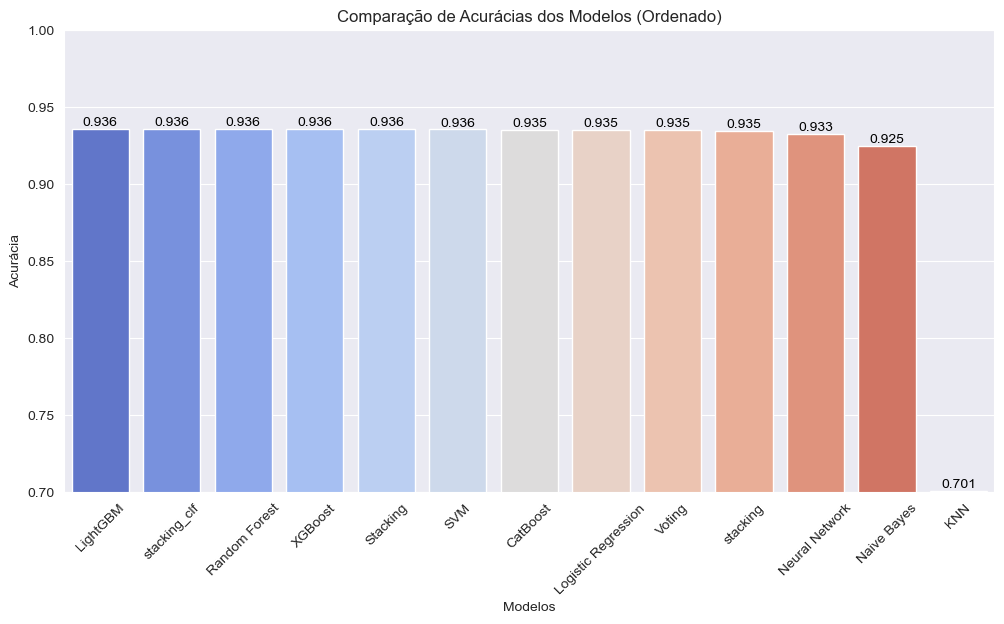

In [105]:
# analisando graficamente as acuracias dos modelos

sorted_results['stacking'] = 0.9345830637083263
sorted_results['stacking_clf'] = 0.9360439951062354

df_accs = pd.DataFrame(list(sorted_results.items()), columns=['Modelo', 'Acurácia'])

# Ordenar os modelos pela acurácia
df_accs = df_accs.sort_values(by="Acurácia", ascending=False)

# Criar o gráfico de barras com rótulos
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Modelo", y="Acurácia", data=df_accs, palette="coolwarm",hue='Modelo')

# Adicionar os valores acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0.7, 1.0)
plt.xlabel("Modelos")
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácias dos Modelos (Ordenado)")
plt.xticks(rotation=45)
plt.show()



In [98]:

def plot_learning_curve(modelo, X, y, cv=5, scoring='roc_auc', train_sizes=np.linspace(0.3, 1.0, 3)):
    train_sizes, train_scores, val_scores = learning_curve(modelo, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    val_scores_mean   = np.mean(val_scores, axis=1)
    val_scores_std    = np.std(val_scores, axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Treino', markersize=8)
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validação', markersize=8)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.15, color='blue')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.15, color='green')

    plt.xlabel('Número de Amostras de Treino')
    plt.ylabel('AUC-ROC')
    plt.title('Curva de Aprendizado')
    plt.ylim(0.90, 1.00)
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()


In [91]:
y_train

array([0, 1, 1, ..., 0, 0, 0])

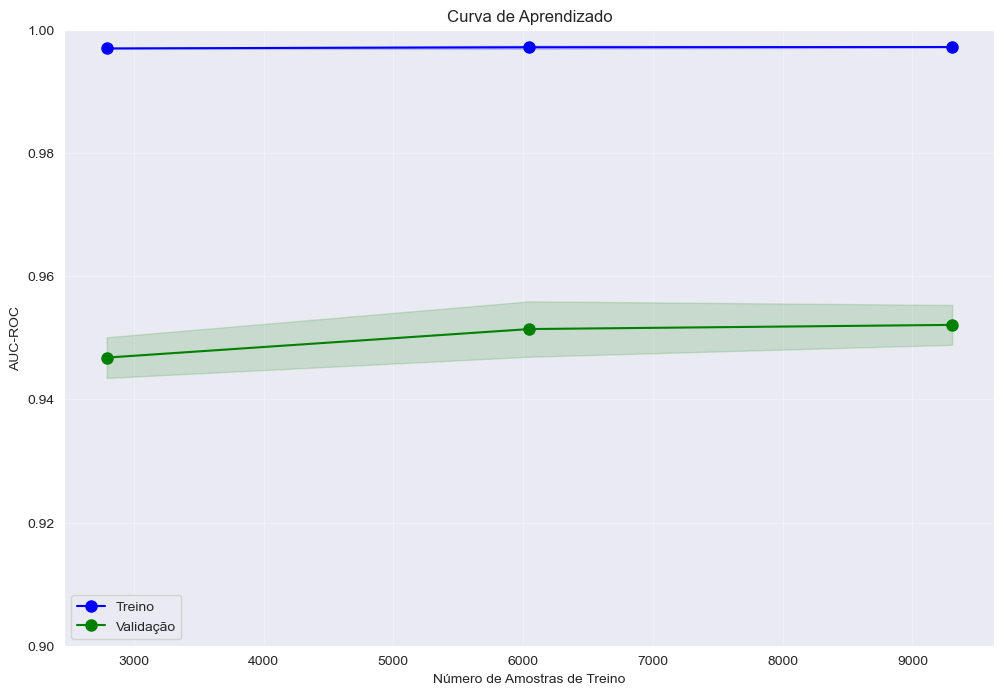

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Gerar curvas para ambos os modelos
#plot_learning_curve(stacking_model, x_train, y_train)
plot_learning_curve(best_stacking_clf, x_train, y_train,cv=5)

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(modelo, X_test, y_test, nome_modelo='Modelo'):
    """
    Plota a curva ROC e calcula a AUC-ROC para um modelo de classificação binária.

    Parâmetros:
    - modelo: Modelo treinado (deve ter o método predict_proba)
    - X_test: Dados de teste (features)
    - y_test: Rótulos verdadeiros dos dados de teste
    - nome_modelo: Nome do modelo para o título do gráfico (opcional)
    """

    # Obter probabilidades previstas para a classe positiva
    y_probs = modelo.predict_proba(X_test)[:, 1]

    # Calcular curva ROC e AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)

    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'{nome_modelo} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')

    # Ajustes estéticos
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title(f'Curva ROC - {nome_modelo}', fontsize=14, pad=20)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.show()


C:\Users\mathe\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\mathe\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\mathe\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\mathe\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


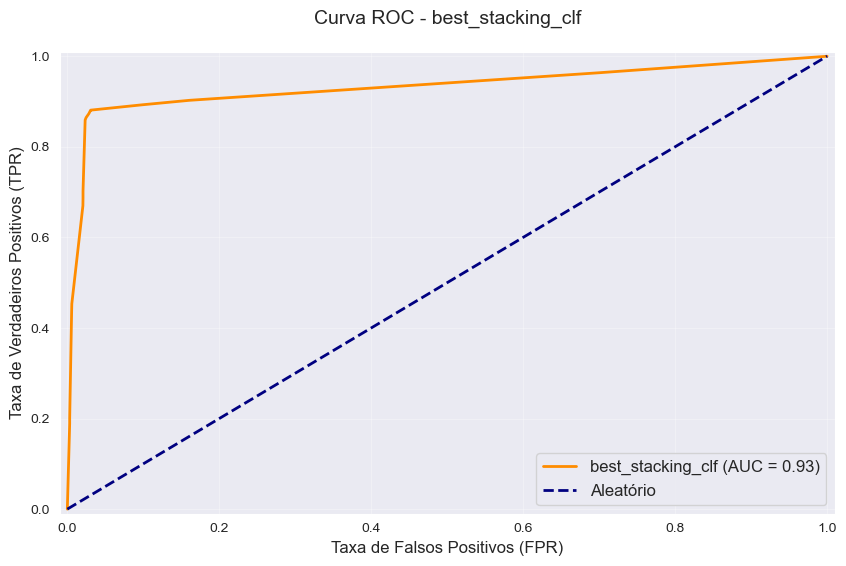

In [101]:
plot_roc_curve(best_stacking_clf, x_train, y_train, nome_modelo='best_stacking_clf')


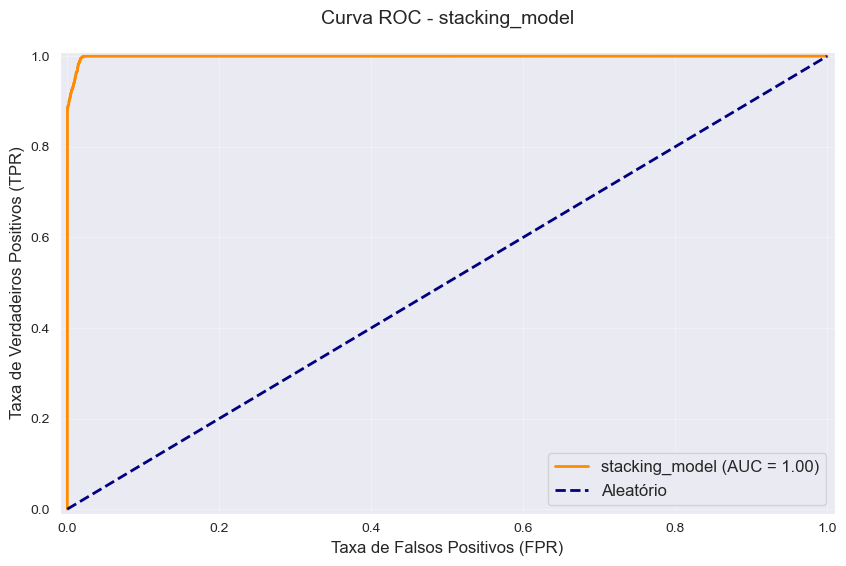

In [102]:
plot_roc_curve(stacking_model, x_train, y_train, nome_modelo='stacking_model')


In [74]:
x_test.drop(columns=cols_drop, inplace=True)

In [197]:
# Supondo que x_test já esteja definido e que o scaler usado foi o mesmo aplicado em x_train
x_test_scaled = scaler.transform(x_test)

# Previsões utilizando o melhor modelo encontrado durante a GridSearchCV
y_test_pred = best_stacking_clf.predict_proba(x_test_scaled)[:, 1]

# Se desejar obter também as probabilidades de cada classe:
probs = grid_search.predict_proba(x_test_scaled)

print("Previsões para x_test:", y_test_pred)
print("Probabilidades para x_test:", probs)


Previsões para x_test: [0.05789129 0.00880581 0.20280282 ... 0.98902345 0.8901644  0.03670357]
Probabilidades para x_test: [[0.9421087  0.05789129]
 [0.9911942  0.00880581]
 [0.79719716 0.20280282]
 ...
 [0.01097655 0.98902345]
 [0.10983562 0.8901644 ]
 [0.9632964  0.03670357]]


In [198]:
# Salvando a previsão no arquivo CSV
df_test['Predicted'] = y_test_pred

#renomeando id para ID
df_test.rename(columns={'id':'Id'}, inplace=True)

#dropando a coluna CLASSE
df_test.to_csv('stacking_otimiz_5model.csv', index=False)
